# Feedforward algorithm

-----



#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------



#### Introduction:


#### How works:


#### Some interesting articles used:

- Tensor flow with shap: https://colab.research.google.com/github/kweinmeister/notebooks/blob/master/tensorflow-shap-college-debt.ipynb#scrollTo=hnjrW173K5-1
- Demonstrate overfitting: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting
- Strategies to prevent overfitting: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting
    * Add weight regularization
    * Add dropout
    * Combined L2 + dropout

- SHAP: https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893
    * DeepExplainer (DEEP SHAP): Support TensorFlow and Keras models by using DeepLIFT and Shapley values.
    * GradientExplainer: Support TensorFlow and Keras models.


#### Documentations used:
- Classification: https://www.tensorflow.org/tutorials/keras/classification
- Regression: https://www.tensorflow.org/tutorials/keras/regression#full_model
- Interpretability: https://www.tensorflow.org/tutorials/interpretability/integrated_gradients
- One-Hot Encoding: https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
- A guide to an efficient way to build neural network architectures: https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b 
- Hyperparameter Tuning with Keras Tuner: https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe
- Hacker's Guide to Hyperparameter Tuning: https://curiousily.com/posts/hackers-guide-to-hyperparameter-tuning/
- Keras Tuner: https://github.com/keras-team/keras-tuner
- Last Dense layer: https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/


#### Interesting Conclusions:

- Mean Squared Error (MSE) and Mean Absolute Error (MAE) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range

---

## Table of Content

* [1. Data Load](#1)

------- Output not normalized ---------

* [2. Data Load from Pre processing and transformation](#2)
    * [2.1. Split the data into train and test](#2.1)
    * [2.2. Inspect data](#2.2)
    * [2.3. Normalize data](#2.3)
   
    
    
* [3. Surgeon-specific Deep Neural Network Model](#3)
    * [3.1. Data Transformation](#3.1)
    * [3.2. Split Data](#3.2)
    * [3.3. Normalization_layer for each surgeon](#3.3)
    * [3.4. Parameters Tunning for each surgeon](#3.4)
    * [3.5. Building Neural Network, Traning and Model Save](#3.5)
    * [3.6. Predictions](#3.6)
         * [3.6.1 Specific surgeon Prediction](#3.6.1)
         * [3.6.2 Overall with all surgeon models](#3.6.2)
         
         
* [4. Speciality-specific Deep Neural Network Model](#4)
    * [4.1. Data Transformation](#4.1)
    * [4.2. Split Data](#4.2)
    * [4.3. Normalization_layer for each surgeon](#4.3)
    * [4.4. Parameters Tunning for each surgeon](#4.4)
    * [4.5. Building Neural Network, Traning and Model Save](#4.5)
    * [4.6. Predictions](#4.6)
         * [4.6.1 Specific surgeon Prediction](#4.6.1)
         * [4.6.2 Overall with all surgeon models](#4.6.2)
         
------- Output normalized ---------
         
* [5. CUF Deep Neural Network Model with Output normalized](#5)
    * [5.1. Data Transformation](#5.1)
    * [5.2. Parameters Tunning ](#5.2)
    * [5.3. Building Neural Network](#5.3)
    * [5.4. Training model](#4.4)
    * [5.5. Performance](#5.5)
    * [5.6. Prediction](#5.6)
    * [5.7. Save Model](#5.7)
    * [5.8. Load model](#5.8)
        





-----

## 1. Data Load <a class="anchor" id="1"></a> 

In [1]:
# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# TensorFlow and tf.keras

import tensorflow as tf
import kerastuner as kt
from kerastuner import HyperModel
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import StandardScaler




#Encoder
from category_encoders import TargetEncoder

#hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import *
from hyperas.distributions import choice, uniform


#table
from tabulate import tabulate
import matplotlib.patches as mpatches





#VERSION
print(tf.__version__)

2.5.0


In [2]:
%store -r data_ml #load dataset generated in other Exploration notebook
data_ml.head()

no stored variable or alias #load
no stored variable or alias dataset
no stored variable or alias generated
no stored variable or alias in
no stored variable or alias other
no stored variable or alias Exploration
no stored variable or alias notebook


,Speciality,SurgeryNumber,SurgeryPerformed_perDoctor,part_of_day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,RealRoomDuration,Age,CUFPlannedDuration,Month,Weekday
0,CIRURGIA GERAL,4,78,Noon(13-16),11,I,RAQ,P,39150013,1,132273102,M,41,65.0,60,April,Tuesday
1,OFTALMOLOGIA,2,51,Morning(9-12),11,A,SED,P,46050006,1,093935231,M,32,71.0,60,July,Wednesday
2,UROLOGIA,1,51,Noon(13-16),11,I,RAQ,P,40010045,1,775653212,M,27,71.0,60,April,Thursday
3,UROLOGIA,1,28,Eve(17-20),11,I,AG,P,40010038,3,462002202,M,55,71.0,60,May,Monday
4,UROLOGIA,1,34,Eve(17-20),11,A,AG,P,40010038,1,462002202,M,12,71.0,60,June,Monday


-----

* ## 2. Data Load from Pre processing and Transformation  <a class="anchor" id="2"></a> 

In [6]:
%store -r Genenal_Dataset
%store -r Specialities_Dataset
%store -r Surgeons_Dataset
%store -r list_surgeons
%store -r list_specialities

### 2.1. Split the data into train and test  <a class="anchor" id="2.1"></a> 


* Rescale and split labels data

In [7]:
train_dataset=Genenal_Dataset['TrainSet']
test_dataset=Genenal_Dataset['TestSet']

In [8]:
test_dataset=Genenal_Dataset['TestSet']

* Split Labels

In [9]:
#split form labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Real Room Duration')
test_labels = test_features.pop('Real Room Duration')

train_CUF_labels = train_features.pop('CUF Planned Duration')
test_CUF_labels = test_features.pop('CUF Planned Duration')



### 2.2. Inspect Data  <a class="anchor" id="2.2"></a> 

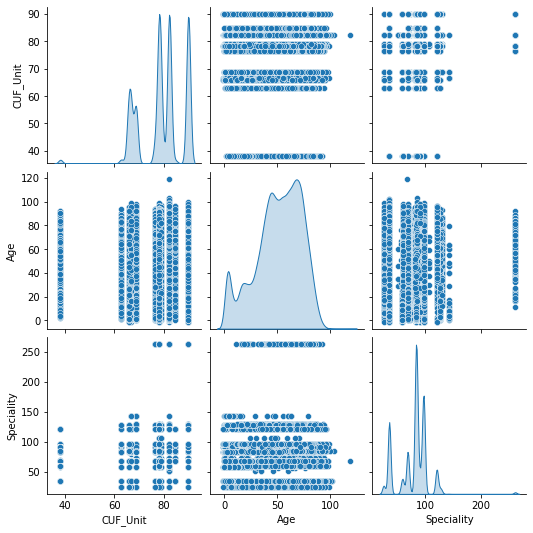

In [10]:
sns.pairplot(train_dataset[['CUF_Unit', 'Age','Speciality']], diag_kind='kde')

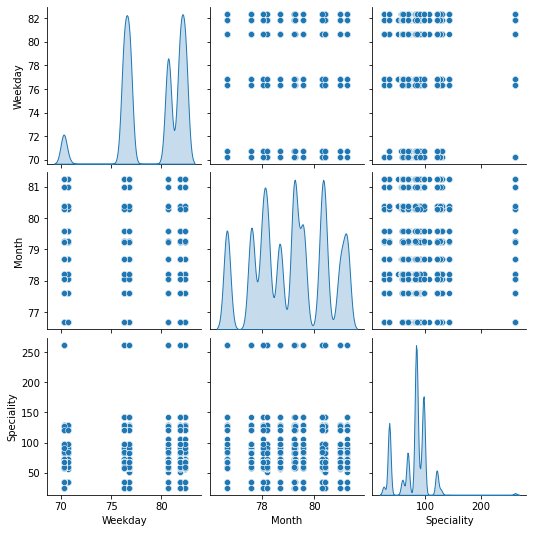

In [11]:
sns.pairplot(train_dataset[['Weekday', 'Month','Speciality']], diag_kind='kde')

In [12]:
# each feature covers a very different range:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Urgency,135816.0,0.016795,0.128502,0.000000,0.000000,0.000000,0.000000,1.000000
Hospitalization,135816.0,0.410636,0.491951,0.000000,0.000000,0.000000,1.000000,1.000000
Gender,135816.0,0.511906,0.499860,0.000000,0.000000,1.000000,1.000000,1.000000
Procedures_I,135816.0,1.590299,0.936753,1.000000,1.000000,1.000000,2.000000,6.000000
Real Room Duration,135816.0,79.068107,59.958021,10.000000,38.000000,63.000000,102.000000,1144.000000
Age,135816.0,50.848427,21.355094,-1.000000,38.000000,53.000000,68.000000,119.000000
CUF Planned Duration,135816.0,83.465880,56.086238,0.000000,60.000000,60.000000,120.000000,1425.000000
Speciality,135816.0,79.068568,27.002927,25.177548,68.580158,84.256971,97.069451,262.250973
Part of the day,135816.0,79.068107,4.281275,72.829596,74.987601,79.510016,84.140671,109.376582
CUF_Unit,135816.0,79.068107,8.669724,38.038363,76.503848,79.016582,82.238419,89.971818


### 2.3. Normalize data  <a class="anchor" id="2.3"></a> 


In [13]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Urgency,0.016795,0.128502
Hospitalization,0.410636,0.491951
Gender,0.511906,0.499860
Procedures_I,1.590299,0.936753
Real Room Duration,79.068107,59.958021
Age,50.848427,21.355094
CUF Planned Duration,83.465880,56.086238
Speciality,79.068568,27.002927
Part of the day,79.068107,4.281275
CUF_Unit,79.068107,8.669724


In [14]:
#Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""

#Dataset
train_dataset = np.asarray(train_dataset).astype(np.float32)
test_dataset = np.asarray(train_dataset).astype(np.float32)

#Features
train_features = np.asarray(train_features).astype(np.float32)
test_features = np.asarray(test_features).astype(np.float32)

#labels
train_labels = np.asarray(train_labels).astype(np.float32)
test_labels = np.asarray(test_labels).astype(np.float32)

#CUF
train_CUF_labels = np.asarray(train_CUF_labels).astype(np.float32)
test_CUF_labels = np.asarray(test_CUF_labels).astype(np.float32)



In [15]:
scaling= StandardScaler() 
train_labels_rescaled = scaling.fit_transform(train_labels.reshape(-1, 1))
test_labels_rescaled = scaling.transform(test_labels.reshape(-1, 1))

It is good practice to normalize features that use different scales and ranges. One reason this is important is because the features are multiplied by the model weights. Normalization makes training much more stable.

In [16]:
# The Normalization layer
normalizer = preprocessing.Normalization()

#This calculates the mean and variance, and stores them in the layer.
normalizer.adapt(np.array(train_features))
print('Mean:',normalizer.mean.numpy())

Mean: [1.6794758e-02 4.1063601e-01 5.1190686e-01 2.0118318e+00 2.6014746e+02
 1.5903007e+00 5.0848457e+01 7.9068703e+01 7.9068222e+01 7.9068077e+01
 7.8962685e+01 7.9066734e+01 7.9068245e+01 7.9068207e+01 7.9068504e+01]


In [17]:
# When the layer is called it returns the input data, with each feature independently normalized:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  0.     0.     1.     2.   200.     2.    17.    91.45  79.51  89.97
  190.83  98.98  80.28  82.36  93.55]]

Normalized: [[-0.13 -0.83  0.98 -0.01 -0.2   0.44 -1.59  0.46  0.1   1.26  2.48  0.57
   0.89  1.01  0.58]]


------

## 3. Surgeon-specific model <a class="anchor" id="3"></a>


* ### 3.1 Data Transformation <a class="anchor" id="3.1"></a>


In [18]:
#list of surgeons
list_surgeons


['132273102', '093935231', '775653212', '462002202', '175018342', ..., '670774102', '366884942', '537046661', '524975801', '806701901']
Length: 381
Categories (381, object): ['132273102', '093935231', '775653212', '462002202', ..., '366884942', '537046661', '524975801', '806701901']

* ### 3.2.  Split Data  <a class="anchor" id="3.2"></a> 


In [19]:
Datasets_surgeon=Surgeons_Dataset

In [20]:
Scaler_surgeons = {}

for i in range(len(Datasets_surgeon)):
    # The Normalization layer
    Scaler_surgeons[i] = StandardScaler() 

In [21]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
train_dataset_surgeons = {}
test_dataset_surgeons = {}

train_features_surgeons = {}
test_features_surgeons = {}

train_labels_surgeons = {}
test_labels_surgeons = {}

rescale_train_labels_surgeons = {}
rescale_test_labels_surgeons = {}

train_CUF_labels_surgeons = {}
test_CUF_labels_surgeons = {}

for i in range(len(Datasets_surgeon)):
    
    train_dataset_surgeons[i] = Datasets_surgeon[list_surgeons[i]]['TrainSet']
    test_dataset_surgeons[i] = Datasets_surgeon[list_surgeons[i]]['TestSet']


    train_features_surgeons[i] = train_dataset_surgeons[i].copy()
    test_features_surgeons[i] = test_dataset_surgeons[i].copy()

    train_labels_surgeons[i] = train_features_surgeons[i].pop('Real Room Duration')
    test_labels_surgeons[i] = test_features_surgeons[i].pop('Real Room Duration')

    train_CUF_labels_surgeons[i] = train_features_surgeons[i].pop('CUF Planned Duration')
    test_CUF_labels_surgeons[i] = test_features_surgeons[i].pop('CUF Planned Duration')
    
    
    #Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""

    #Dataset
    train_dataset_surgeons[i] = np.asarray(train_dataset_surgeons[i]).astype(np.float32)
    test_dataset_surgeons[i] = np.asarray(test_dataset_surgeons[i]).astype(np.float32)

    #Features
    train_features_surgeons[i] = np.asarray(train_features_surgeons[i]).astype(np.float32)
    test_features_surgeons[i] = np.asarray(test_features_surgeons[i]).astype(np.float32)

    #labels
    train_labels_surgeons[i] = np.asarray(train_labels_surgeons[i]).astype(np.float32)
    test_labels_surgeons[i] = np.asarray(test_labels_surgeons[i]).astype(np.float32)
    
    
    
    rescale_train_labels_surgeons[i]  = Scaler_surgeons[i].fit_transform((train_labels_surgeons[i].reshape(-1, 1)))
    rescale_test_labels_surgeons[i] = Scaler_surgeons[i].transform(test_labels_surgeons[i].reshape(-1, 1))



    #CUF
    train_CUF_labels_surgeons[i] = np.asarray(train_CUF_labels_surgeons[i]).astype(np.float32)
    test_CUF_labels_surgeons[i] = np.asarray(test_CUF_labels_surgeons[i]).astype(np.float32)



* ### 3.3. Normalization_layer for each surgeon  <a class="anchor" id="3.3"></a> 


In [22]:
Normalization_layer = {}

for i in range(len(Datasets_surgeon)):
    # The Normalization layer
    Normalization_layer[i] = preprocessing.Normalization()

    #This calculates the mean and variance, and stores them in the layer.
    Normalization_layer[i].adapt(np.array(train_features_surgeons[i]))


KeyboardInterrupt: 

In [ ]:
Dictionary_Surgeon_models={} #creation of dictionaries for all 442 models 

for i in range(len(list_surgeons)):
    Dictionary_Surgeon_models.update({list_surgeons[i]:{}})

#this_dict = {}this_dict = {}

In [170]:
Predictions_Surgeon_models={} #creation of dictionaries for all 442 models 

for i in range(len(list_surgeons)):
    Predictions_Surgeon_models.update({list_surgeons[i]:{}})

#this_dict = {}this_dict = {}

In [171]:
Best_number_of_layers_surgeon={} #creation of dictionaries for all 442 models 

for i in range(len(list_surgeons)):
    Best_number_of_layers_surgeon.update({list_surgeons[i]:{}})

#this_dict = {}this_dict = {}


* ### 3.4. Parameters Tunning for each surgeon  <a class="anchor" id="3.4"></a> 




In [23]:
def generate_model(layers_number,surgeon):
    
    tf.keras.backend.clear_session()
    
    modelgenerate = tf.keras.Sequential()
    modelgenerate.add(Normalization_layer[surgeon])

    for i in range(0,layers_number):
        
        print(i)
        modelgenerate.add(tf.keras.layers.Dense(units=50,activation='relu'))
    
    modelgenerate.add(tf.keras.layers.Dense(1))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    modelgenerate.compile(
                optimizer=opt,
                loss='mse',metrics=['mse']
            )
    return modelgenerate

In [24]:
layers=np.arange(2,22,2)

History_layers_surgeon= {}
for i in range(len(layers)):
    History_layers_surgeon.update({layers[i]:{}})
    
surgeon=130

for j in range(len(layers)):
    
    
    layers_number=layers[j]
    
    modelgenerate=generate_model(layers_number,surgeon)
    
    
    history = modelgenerate.fit(
        train_features_surgeons[surgeon], rescale_train_labels_surgeons[surgeon],
        validation_split=0.2,  #Fraction of the training data to be used as validation data.
        verbose=1, epochs=100)
    

    
    History_layers_surgeon[layers[j]].update({"History": history})

0
1
Epoch 1/100
19/19 [==============================] - 1s 21ms/step - loss: 0.6938 - mse: 0.6938 - val_loss: 0.5547 - val_mse: 0.5547
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5013 - mse: 0.5013 - val_loss: 0.4379 - val_mse: 0.4379
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.3971 - val_mse: 0.3971
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3882 - mse: 0.3882 - val_loss: 0.3742 - val_mse: 0.3742
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3677 - mse: 0.3677 - val_loss: 0.3721 - val_mse: 0.3721
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3516 - mse: 0.3516 - val_loss: 0.3632 - val_mse: 0.3632
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3388 - mse: 0.3388 - val_loss: 0.3540 - val_mse: 0.3540
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.332

19/19 [==============================] - 0s 3ms/step - loss: 0.1481 - mse: 0.1481 - val_loss: 0.5965 - val_mse: 0.5965
Epoch 64/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 0.6142 - val_mse: 0.6142
Epoch 65/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1454 - mse: 0.1454 - val_loss: 0.5990 - val_mse: 0.5990
Epoch 66/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.6184 - val_mse: 0.6184
Epoch 67/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1585 - mse: 0.1585 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 68/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.6253 - val_mse: 0.6253
Epoch 69/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1424 - mse: 0.1424 - val_loss: 0.6300 - val_mse: 0.6300
Epoch 70/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1413 - mse: 0

Epoch 87/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.8595 - val_mse: 0.8595
Epoch 88/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.8785 - val_mse: 0.8785
Epoch 89/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 90/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.8454 - val_mse: 0.8454
Epoch 91/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 92/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.9054 - val_mse: 0.9054
Epoch 93/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.8766 - val_mse: 0.8766
Epoch 94/100
19/19 [==============================] - 0s 3ms/step - loss: 0.

19/19 [==============================] - 0s 3ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 1.0095 - val_mse: 1.0095
Epoch 50/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0565 - mse: 0.0565 - val_loss: 1.0503 - val_mse: 1.0503
Epoch 51/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 1.1017 - val_mse: 1.1017
Epoch 52/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.9768 - val_mse: 0.9768
Epoch 53/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 1.1212 - val_mse: 1.1212
Epoch 54/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 55/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 1.0322 - val_mse: 1.0322
Epoch 56/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0511 - mse: 0

19/19 [==============================] - 0s 4ms/step - loss: 0.3364 - mse: 0.3364 - val_loss: 0.5002 - val_mse: 0.5002
Epoch 12/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2962 - mse: 0.2962 - val_loss: 0.4731 - val_mse: 0.4731
Epoch 13/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2657 - mse: 0.2657 - val_loss: 0.4865 - val_mse: 0.4865
Epoch 14/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2651 - mse: 0.2651 - val_loss: 0.5040 - val_mse: 0.5040
Epoch 15/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2545 - mse: 0.2545 - val_loss: 0.5297 - val_mse: 0.5297
Epoch 16/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2418 - mse: 0.2418 - val_loss: 0.5324 - val_mse: 0.5324
Epoch 17/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1988 - mse: 0.1988 - val_loss: 0.6774 - val_mse: 0.6774
Epoch 18/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1843 - mse: 0

19/19 [==============================] - 0s 4ms/step - loss: 0.1058 - mse: 0.1058 - val_loss: 1.0383 - val_mse: 1.0383
Epoch 36/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.9095 - val_mse: 0.9095
Epoch 37/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.9076 - val_mse: 0.9076
Epoch 38/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 1.0027 - val_mse: 1.0027
Epoch 39/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 0.8911 - val_mse: 0.8911
Epoch 40/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1190 - mse: 0.1190 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 41/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0797 - mse: 0.0797 - val_loss: 0.9479 - val_mse: 0.9479
Epoch 42/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0735 - mse: 0

19/19 [==============================] - 0s 4ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.8912 - val_mse: 0.8912
Epoch 60/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0883 - mse: 0.0883 - val_loss: 1.0692 - val_mse: 1.0692
Epoch 61/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0748 - mse: 0.0748 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 62/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.9474 - val_mse: 0.9474
Epoch 63/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0546 - mse: 0.0546 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 64/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.9421 - val_mse: 0.9421
Epoch 65/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.7517 - val_mse: 0.7517
Epoch 66/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0589 - mse: 0

Epoch 21/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1323 - mse: 0.1323 - val_loss: 0.7932 - val_mse: 0.7932
Epoch 22/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0907 - mse: 0.0907 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 23/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.7603 - val_mse: 0.7603
Epoch 24/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.8890 - val_mse: 0.8890
Epoch 25/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0800 - mse: 0.0800 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 26/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.8729 - val_mse: 0.8729
Epoch 27/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.7090 - val_mse: 0.7090
Epoch 28/100
19/19 [==============================] - 0s 4ms/step - loss: 0.

19/19 [==============================] - 0s 5ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.8022 - val_mse: 0.8022
Epoch 84/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 85/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.8072 - val_mse: 0.8072
Epoch 86/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.7449 - val_mse: 0.7449
Epoch 87/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 88/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 89/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.7935 - val_mse: 0.7935
Epoch 90/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0235 - mse: 0

Epoch 45/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1191 - mse: 0.1191 - val_loss: 0.7644 - val_mse: 0.7644
Epoch 46/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0727 - mse: 0.0727 - val_loss: 0.7631 - val_mse: 0.7631
Epoch 47/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.6847 - val_mse: 0.6847
Epoch 48/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1074 - mse: 0.1074 - val_loss: 0.9157 - val_mse: 0.9157
Epoch 49/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0782 - mse: 0.0782 - val_loss: 1.0766 - val_mse: 1.0766
Epoch 50/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0759 - mse: 0.0759 - val_loss: 0.6639 - val_mse: 0.6639
Epoch 51/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0771 - mse: 0.0771 - val_loss: 0.8385 - val_mse: 0.8385
Epoch 52/100
19/19 [==============================] - 0s 5ms/step - loss: 0.

Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3841 - mse: 0.3841 - val_loss: 0.4796 - val_mse: 0.4796
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3801 - mse: 0.3801 - val_loss: 0.3890 - val_mse: 0.3890
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3248 - mse: 0.3248 - val_loss: 0.4633 - val_mse: 0.4633
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3797 - mse: 0.3797 - val_loss: 0.3998 - val_mse: 0.3998
Epoch 11/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2977 - mse: 0.2977 - val_loss: 0.4143 - val_mse: 0.4143
Epoch 12/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2846 - mse: 0.2846 - val_loss: 0.5656 - val_mse: 0.5656
Epoch 13/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2813 - mse: 0.2813 - val_loss: 0.4409 - val_mse: 0.4409
Epoch 14/100
19/19 [==============================] - 0s 5ms/step - loss: 0.278

19/19 [==============================] - 0s 5ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.5845 - val_mse: 0.5845
Epoch 70/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.6165 - val_mse: 0.6165
Epoch 71/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 72/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.5135 - val_mse: 0.5135
Epoch 73/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.6641 - val_mse: 0.6641
Epoch 74/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.5291 - val_mse: 0.5291
Epoch 75/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.7106 - val_mse: 0.7106
Epoch 76/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0349 - mse: 0

Epoch 31/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0953 - mse: 0.0953 - val_loss: 0.9224 - val_mse: 0.9224
Epoch 32/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.7227 - val_mse: 0.7227
Epoch 33/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 34/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1086 - mse: 0.1086 - val_loss: 0.8610 - val_mse: 0.8610
Epoch 35/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0977 - mse: 0.0977 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 36/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.7117 - val_mse: 0.7117
Epoch 37/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.9567 - val_mse: 0.9567
Epoch 38/100
19/19 [==============================] - 0s 5ms/step - loss: 0.

19/19 [==============================] - 0s 5ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.6139 - val_mse: 0.6139
Epoch 94/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.8545 - val_mse: 0.8545
Epoch 95/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.9153 - val_mse: 0.9153
Epoch 96/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.6036 - val_mse: 0.6036
Epoch 97/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.7784 - val_mse: 0.7784
Epoch 98/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.9288 - val_mse: 0.9288
Epoch 99/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.8959 - val_mse: 0.8959
Epoch 100/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0258 - mse: 

In [209]:
    

History_layers

{2: {'History': <tensorflow.python.keras.callbacks.History at 0x1681f5be160>},
 4: {'History': <tensorflow.python.keras.callbacks.History at 0x1680f9bda00>},
 6: {'History': <tensorflow.python.keras.callbacks.History at 0x168223857c0>},
 8: {'History': <tensorflow.python.keras.callbacks.History at 0x167e714b940>},
 10: {'History': <tensorflow.python.keras.callbacks.History at 0x1680ad09640>},
 12: {'History': <tensorflow.python.keras.callbacks.History at 0x168175c08b0>},
 14: {'History': <tensorflow.python.keras.callbacks.History at 0x168229eca30>},
 16: {'History': <tensorflow.python.keras.callbacks.History at 0x16823f539d0>},
 18: {'History': <tensorflow.python.keras.callbacks.History at 0x16822646370>},
 20: {'History': <tensorflow.python.keras.callbacks.History at 0x168252c9460>}}

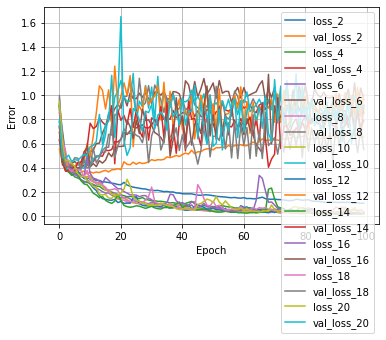

In [25]:
def plot_loss_surgeon():
    
    for i in range(len(layers)):
        
        name_loss="loss_{}".format(layers[i])
        name_val_loss="val_loss_{}".format(layers[i])
        history=History_layers_surgeon[layers[i]]["History"]
        plt.plot(history.history['loss'], label=name_loss)
        plt.plot(history.history['val_loss'], label=name_val_loss)
    
    
    plt.xlabel('Epoch')
    plt.ylabel("Error")
        
    plt.legend()
    plt.grid(True)

plot_loss_surgeon()



In [26]:

min_list=[]
min_loss_train=[]
for b in range(len(layers)):
    history=History_layers_surgeon[layers[b]]["History"]
    min_list=min_list+[min(history.history['val_loss'])]
    min_loss_train=min_loss_train+[min(history.history['loss'])]
    #plt.plot(history.history['loss'], label=name_loss)
    
    
Min_Loss = {"Number of Layers": layers, "Minimum Loss Point in Validation": min_list}
Min_Loss=pd.DataFrame(Min_Loss)
Min_Loss

,Number of Layers,Minimum Loss Point in Validation
0,2,0.349686
1,4,0.369886
2,6,0.403144
3,8,0.393535
4,10,0.389190
5,12,0.407796
6,14,0.375540
7,16,0.376074
8,18,0.388966
9,20,0.452519


In [27]:
number_of_layers_surgeon=Min_Loss["Number of Layers"][Min_Loss["Minimum Loss Point in Validation"]==min(Min_Loss["Minimum Loss Point in Validation"])].values[0]
number_of_layers_surgeon

2

In [174]:
number_of_layers_surgeon=2

In [175]:
#Variation number of hidden layers

class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = tf.keras.Sequential()
        
        print(normalizer3)
        model.add(normalizer3)
        
        
        for i in range(0,number_of_layers_surgeon):
            model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=16,
                                                max_value=64,
                                                step=4),activation='relu'))
            
            
            model.add(tf.keras.layers.BatchNormalization())
            
            model.add(
            tf.keras.layers.Dropout(
                hp.Float(
                    'dropout_' + str(i),
                    min_value=0.1,
                    max_value=0.5,
                    default=0.1,
                    step=0.05)
            ))
            
            

        

        
        model.add(tf.keras.layers.Dense(1))
        
        lr = hp.Choice('learning_rate', [1e-2, 1e-3])
        
       
       
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse',metrics=['mse']
    
        )
        
        return model

In [176]:
for i in range(len(list_surgeons)):
    
    input_shape = (train_features_surgeons[i].shape[1],)
    normalizer3=Normalization_layer[i]
    hypermodel= RegressionHyperModel(input_shape)
    
    name="RandomSearch_Surgeon_{}".format(i)

    tuner_rs= RandomSearch(
                hypermodel,
                objective='val_mse',
                seed=42,
                max_trials=20,
                project_name=name,
                executions_per_trial=1)
    print(i)
    tuner_rs.search(train_features_surgeons[i], rescale_train_labels_surgeons[i], epochs=10, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)], verbose=1)
    print(i)
    hyperparameters_hb=tuner_rs.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
    print(i)
    best_mode_rs = tuner_rs.get_best_models(num_models=1)[0]
    loss, mse = best_mode_rs.evaluate(test_features_surgeons[i],rescale_test_labels_surgeons[i])
    
    Dictionary_Surgeon_models[list_surgeons[i]].update({"Hyperparameters": hyperparameters_hb})
    Dictionary_Surgeon_models[list_surgeons[i]].update({"Model": tuner_rs})
    Dictionary_Surgeon_models[list_surgeons[i]].update({"Evaluation": [loss, mse]})

INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_0\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_0\tuner0.json
0
INFO:tensorflow:Oracle triggered exit
0
0
3/3 [==============================] - 0s 0s/step - loss: 0.9355 - mse: 0.9355
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_1\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_1\tuner0.json
1
INFO:tensorflow:Oracle triggered exit
1
1
1/1 [==============================] - 0s 308ms/step - loss: 0.7122 - mse: 0.7122
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_2\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_2\tuner0.json
2
INFO:tensorflow:Oracle triggered exit
2
2
2/2 [==============================] - 0s 0s/step - loss: 0.3224 - mse: 0.3224
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_3\oracle.json
INFO:tensorflow:Reloading Tuner from .

6
INFO:tensorflow:Oracle triggered exit
6
6
2/2 [==============================] - 0s 0s/step - loss: 0.2119 - mse: 0.2119
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_7\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_7\tuner0.json
7
INFO:tensorflow:Oracle triggered exit
7
7
2/2 [==============================] - 0s 0s/step - loss: 107564856.0000 - mse: 107564856.0000
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_8\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_8\tuner0.json
8
INFO:tensorflow:Oracle triggered exit
8
8
6/6 [==============================] - 0s 4ms/step - loss: 0.4196 - mse: 0.4196
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_9\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_9\tuner0.json
9
INFO:tensorflow:Oracle triggered exit
9
9
1/1 [==============================] - 0s 469ms/step - loss: 0.5106 - ms

INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_19\tuner0.json
19
INFO:tensorflow:Oracle triggered exit
19
19
4/4 [==============================] - 0s 4ms/step - loss: 0.3687 - mse: 0.3687
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_20\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_20\tuner0.json
20
INFO:tensorflow:Oracle triggered exit
20
20
2/2 [==============================] - 0s 0s/step - loss: 0.2191 - mse: 0.2191
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_21\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_21\tuner0.json
21
INFO:tensorflow:Oracle triggered exit
21
21
3/3 [==============================] - 0s 5ms/step - loss: 0.2164 - mse: 0.2164
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_22\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_22\tuner0.json
22
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_25\tuner0.json
25
INFO:tensorflow:Oracle triggered exit
25
25
2/2 [==============================] - 0s 0s/step - loss: 0.3727 - mse: 0.3727
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_26\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_26\tuner0.json
26
INFO:tensorflow:Oracle triggered exit
26
26
1/1 [==============================] - 0s 500ms/step - loss: 0.4015 - mse: 0.4015
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_27\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_27\tuner0.json
27
INFO:tensorflow:Oracle triggered exit
27
27
2/2 [==============================] - 0s 0s/step - loss: 0.3841 - mse: 0.3841
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_28\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_28\tuner0.json
28
INFO:tensorflow:Oracle triggered exit

INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_31\tuner0.json
31
INFO:tensorflow:Oracle triggered exit
31
31
1/1 [==============================] - 0s 344ms/step - loss: 0.5326 - mse: 0.5326
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_32\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_32\tuner0.json
32
INFO:tensorflow:Oracle triggered exit
32
32
2/2 [==============================] - 0s 0s/step - loss: 0.5761 - mse: 0.5761
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_33\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_33\tuner0.json
33
INFO:tensorflow:Oracle triggered exit
33
33
4/4 [==============================] - 1s 2ms/step - loss: 0.4171 - mse: 0.4171
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_34\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_34\tuner0.json
34
INFO:tensorflow:Oracle triggered exi

37
37
2/2 [==============================] - 0s 0s/step - loss: 0.3901 - mse: 0.3901
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_38\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_38\tuner0.json
38
INFO:tensorflow:Oracle triggered exit
38
38
1/1 [==============================] - 0s 436ms/step - loss: 0.8701 - mse: 0.8701
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_39\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_39\tuner0.json
39
INFO:tensorflow:Oracle triggered exit
39
39
1/1 [==============================] - 0s 419ms/step - loss: 0.8796 - mse: 0.8796
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_40\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_40\tuner0.json
40
INFO:tensorflow:Oracle triggered exit
40
40


Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000167BAB32820>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 58, in __del__
    self.deleter(self.graph)
KeyboardInterrupt: 


2/2 [==============================] - 1s 3ms/step - loss: 0.4578 - mse: 0.4578
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_41\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_41\tuner0.json
41
INFO:tensorflow:Oracle triggered exit
41
41
3/3 [==============================] - 1s 2ms/step - loss: 0.5782 - mse: 0.5782
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_42\oracle.json


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-175-9bb0e040c746>", line 20, in build
    model.add(tf.keras.layers.BatchNormalization())
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\training\tracking\base.py", line 522, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 228, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 969, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1107, in _functional_construction_call
    outputs = self._keras_tensor_symboli

Invalid model 0/5


Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 404, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 205, in schedule
    self._event_pipe.send(b'')
  File "C:\Users\Asus\anaconda3\lib\site-packages\zmq\sugar\socket.py", line 491, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 720, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 767, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 242, in zmq.backend.cython.socket._send_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_42\tuner0.json
42
INFO:tensorflow:Oracle triggered exit
42
42


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


1/1 [==============================] - 0s 270ms/step - loss: 0.3671 - mse: 0.3671
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_43\oracle.json


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_43\tuner0.json
43
INFO:tensorflow:Oracle triggered exit
43
43
Invalid model 0/5


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-175-9bb0e040c746>", line 20, in build
    model.add(tf.keras.layers.BatchNormalization())
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\training\tracking\base.py", line 522, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 228, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 969, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1107, in _functional_construction_call
    outputs = self._keras_tensor_symboli

2/2 [==============================] - 0s 0s/step - loss: 0.5735 - mse: 0.5735
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_44\oracle.json


Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 404, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 205, in schedule
    self._event_pipe.send(b'')
  File "C:\Users\Asus\anaconda3\lib\site-packages\zmq\sugar\socket.py", line 491, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 720, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 767, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 242, in zmq.backend.cython.socket._send_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3958, in _get_op_def
    return self._op_def_cache[type]
KeyError: 'Placeholder'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-175-9bb0e040c746>", line 10, in build
    model.add(normalizer3)
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\training\tracking\base.py", line 522, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 213, in add
    layer(x)
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 969, in __call__
    return self._functiona

Invalid model 0/5


Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000167BAB32820>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 58, in __del__
    self.deleter(self.graph)
KeyboardInterrupt: 


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_44\tuner0.json
44
INFO:tensorflow:Oracle triggered exit
44
44


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


1/1 [==============================] - 0s 306ms/step - loss: 0.5010 - mse: 0.5010
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_45\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_45\tuner0.json
45
INFO:tensorflow:Oracle triggered exit
45
45


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


1/1 [==============================] - 0s 322ms/step - loss: 0.4443 - mse: 0.4443
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_46\oracle.json


Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 404, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\iostream.py", line 205, in schedule
    self._event_pipe.send(b'')
  File "C:\Users\Asus\anaconda3\lib\site-packages\zmq\sugar\socket.py", line 491, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 720, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 767, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 242, in zmq.backend.cython.socket._send_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_46\tuner0.json
46
INFO:tensorflow:Oracle triggered exit
46
46
1/1 [==============================] - 0s 305ms/step - loss: 3.4618 - mse: 3.4618
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_47\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_47\tuner0.json
47
INFO:tensorflow:Oracle triggered exit
47
47


Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000167BAB32820>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 58, in __del__
    self.deleter(self.graph)
KeyboardInterrupt: 


1/1 [==============================] - 0s 278ms/step - loss: 0.3641 - mse: 0.3641
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_48\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_48\tuner0.json
48
INFO:tensorflow:Oracle triggered exit
48
48
1/1 [==============================] - 0s 299ms/step - loss: 0.8483 - mse: 0.8483
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_49\oracle.json


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000167BCDDD430>
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_49\tuner0.json
49
INFO:tensorflow:Oracle triggered exit
49
49
1/1 [==============================] - 0s 314ms/step - loss: 0.5250 - mse: 0.5250
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_50\oracle.json


KeyboardInterrupt: 

In [177]:

def best_batch_size(j):
    
    History_data= {}


    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


    batch_size = [2, 4, 8,16, 32,64]

    better_history = float("Inf")

    for b in range(len(batch_size)):
        History_data.update({batch_size[b]:{}})

    for t in range(len(batch_size)):
        #Mean Absolute Error is less sensitive to outliers

        
        model_cuf_name="model_cuf_surgeon_{}".format(j)

        model_cuf_name = tf.keras.Sequential()
        model_cuf_name.add(Normalization_layer[j])


        #num_layers=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"]["num_layers"]

        for i in range(0,number_of_layers_surgeon):
            name="units_{}".format(i)
            name_dropout="dropout_{}".format(i)

            model_cuf_name.add(tf.keras.layers.Dense(units=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"][name],activation='relu'))
            model_cuf_name.add(tf.keras.layers.BatchNormalization())

            model_cuf_name.add(tf.keras.layers.Dropout(Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"][name_dropout]))





        model_cuf_name.add(tf.keras.layers.Dense(1))


        lr=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"]["learning_rate"]
        model_cuf_name.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='mse')

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        history = model_cuf_name.fit(
        train_features_surgeons[j], rescale_train_labels_surgeons[j],callbacks=[early_stopping],
        validation_split=0.2,batch_size=batch_size[t],  #Fraction of the training data to be used as validation data.
        verbose=0, epochs=200)


        actual_history=min(history.history['val_loss'])
        
        if actual_history < better_history:
            better_history = actual_history
            best_params = batch_size[t]
        History_data[batch_size[t]].update({"History": history})
    return best_params




* ### 3.5.  Building Neural Network, Traning and Model Save <a class="anchor" id="3.5"></a> 

In [197]:
# Neural network
for j in range(len(list_surgeons)):
  
    best_batch=best_batch_size(j) #choose the best batch size for each batch_size
    print(best_batch)
    
    model_cuf_name="model_cuf_surgeon_{}".format(j)
    
    model_cuf_name = tf.keras.Sequential()
    model_cuf_name.add(Normalization_layer[j])
    
    
    #num_layers=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"]["num_layers"]

    for i in range(0,number_of_layers_surgeon):
        name="units_{}".format(i)
        name_dropout="dropout_{}".format(i)
        
        model_cuf_name.add(tf.keras.layers.Dense(units=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"][name],activation='relu'))
        model_cuf_name.add(tf.keras.layers.BatchNormalization())
        
        model_cuf_name.add(tf.keras.layers.Dropout(Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"][name_dropout]))
       

        
    
    
    model_cuf_name.add(tf.keras.layers.Dense(1))
    
    
    lr=Dictionary_Surgeon_models[list_surgeons[j]]["Hyperparameters"]["learning_rate"]
    model_cuf_name.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse')
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    
    history = model_cuf_name.fit(
    train_features_surgeons[j], rescale_train_labels_surgeons[j],callbacks=[early_stopping],
    validation_split=0.2,batch_size=best_batch,  #Fraction of the training data to be used as validation data.
    verbose=0, epochs=200)
    
    evaluation=model_cuf_name.evaluate(test_features_surgeons[j],rescale_test_labels_surgeons[j], verbose=0)
    
    predictions=model_cuf_name.predict(test_features_surgeons[j]).flatten()
    
    
    name="model_cuf_surgeon_{}".format(j)
    model_cuf_name.save(name)
    
    Predictions_Surgeon_models[list_surgeons[j]].update({"Modelname": name})
    Predictions_Surgeon_models[list_surgeons[j]].update({"HistoryTrain": history})
    Predictions_Surgeon_models[list_surgeons[j]].update({"Final_Evaluation": evaluation})
    Predictions_Surgeon_models[list_surgeons[j]].update({"Predictions": predictions})
    
    
  


16


KeyboardInterrupt: 

* ### 3.6.  Predictions <a class="anchor" id="3.6"></a> 



In [69]:
Loading_Surgeon_models={}  

for i in range(len(list_surgeons)):

    Loading_Surgeon_models.update({list_surgeons[i]:{}})

for i in range(len(list_surgeons)): 
    
    
    name="model_cuf_surgeon_{}".format(i)
    Reloaded = tf.keras.models.load_model(name)
    
    evaluation=Reloaded.evaluate(test_features_surgeons[i],rescale_test_labels_surgeons[i], verbose=0)
    
    predictions=Reloaded.predict(test_features_surgeons[i]).flatten()
    predictions_remove_scale=Scaler_surgeons[i].inverse_transform(predictions) #remove normalization of labels
    
    print(i)
    #Loading_Surgeon_models[list_surgeons[i]].update({"Label DNN":Predictions_Surgeon_models[list_surgeons[i]]["Predictions"]})
    Loading_Surgeon_models[list_surgeons[i]].update({"Final_Evaluation": evaluation})
    Loading_Surgeon_models[list_surgeons[i]].update({"Label DNN":predictions_remove_scale})
    
    Loading_Surgeon_models[list_surgeons[i]].update({"Planned CUF": test_CUF_labels_surgeons[i]})
    Loading_Surgeon_models[list_surgeons[i]].update({"Real Duaration":test_labels_surgeons[i]})

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

* #### 3.6.1  Specific surgeon Prediction <a class="anchor" id="3.6.1"></a> 



In [211]:
#choose a number between 0-380 to choose speciality
i=6
planned_bycuf=Loading_Surgeon_models[list_surgeons[i]]["Planned CUF"]
labels_test=Loading_Surgeon_models[list_surgeons[i]]["Label DNN"]
real_duration=Loading_Surgeon_models[list_surgeons[i]]["Real Duaration"]

print("Prediction to {} doctor ".format(list_surgeons[i]))

Prediction to 0094051011 doctor 


* Model

In [212]:
name="RandomSearch_Surgeon_{}".format(i)

input_shape = (train_features_surgeons[i].shape[1],)
normalizer3=Normalization_layer[i]
hypermodel= RegressionHyperModel(input_shape)

tuner_rs_final= RandomSearch(
                hypermodel,
                objective='val_mse',
                seed=42,
                max_trials=20,
                project_name=name,
                executions_per_trial=1)
    
parameters=tuner_rs_final.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
parameters
    


INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Surgeon_6\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Surgeon_6\tuner0.json


{'units_0': 64,
 'dropout_0': 0.3500000000000001,
 'units_1': 60,
 'dropout_1': 0.15000000000000002,
 'learning_rate': 0.01}

In [213]:
name="model_cuf_surgeon_{}".format(i)
Reloaded_pred = tf.keras.models.load_model(name)
Reloaded_pred.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 14)                29        
_________________________________________________________________
dense_147 (Dense)            (None, 64)                960       
_________________________________________________________________
batch_normalization_98 (Batc (None, 64)                256       
_________________________________________________________________
dropout_98 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_148 (Dense)            (None, 60)                3900      
_________________________________________________________________
batch_normalization_99 (Batc (None, 60)                240       
_________________________________________________________________
dropout_99 (Dropout)         (None, 60)              

In [214]:
Reloaded_pred.evaluate(test_features_surgeons[i],rescale_test_labels_surgeons[i], verbose=0)

0.17140772938728333

In [215]:
dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from DNN": labels_test}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton

,Real Duration,Planned by Cuf,Labels from DNN
0,67.0,60.0,53.995041
1,86.0,90.0,95.970032
2,51.0,60.0,45.930836
3,42.0,60.0,47.899849
4,83.0,120.0,108.915840
...,...,...,...
56,95.0,120.0,91.226105
57,41.0,60.0,77.072540
58,68.0,60.0,59.789104
59,41.0,60.0,66.564316


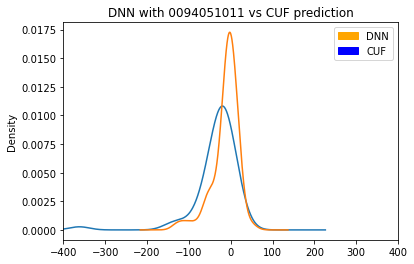

In [216]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_DNN'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_DNN'].plot(kind='density')


plt.xlim([-400, 400])
label="DNN with {} vs CUF prediction".format(list_surgeons[i])
plt.title(label)
orange_patch = mpatches.Patch(color='orange', label='DNN')
blue_patch = mpatches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])


In [217]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
DNN_overuse=dataset_predicton[dataset_predicton['Error_DNN']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
DNN_under=dataset_predicton[dataset_predicton['Error_DNN']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
DNN_Within=dataset_predicton[dataset_predicton['Error_DNN'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [218]:
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['DNN Model', DNN_Within, DNN_overuse,DNN_under]]
print(tabulate(table2))

---------  -------------------  -------------------  ------------------
Model      Within               Overutilization      Underutilization
CUF Model  0.19672131147540983  0.09836065573770492  0.7049180327868853
DNN Model  0.39344262295081966  0.18032786885245902  0.4262295081967213
---------  -------------------  -------------------  ------------------



* #### 3.6.2  Overall with all surgeon models <a class="anchor" id="3.6.2"></a> 


In [219]:
def generalresults_surgeon(i):
    
    #load model
    planned_bycuf=Loading_Surgeon_models[list_surgeons[i]]["Planned CUF"]
    labels_test=Loading_Surgeon_models[list_surgeons[i]]["Label DNN"]
    real_duration=Loading_Surgeon_models[list_surgeons[i]]["Real Duaration"]
    
    #generate table for each speciality
    dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from DNN": labels_test}
    dataset_predicton=pd.DataFrame(dataset_predicton)
    dataset_predicton
    
    #generate errors for each speciality
    dataset_predicton['Error_DNN'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #percentage (0-1)- Overutilization
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    DNN_overuse=dataset_predicton[dataset_predicton['Error_DNN']>10].shape[0]/dataset_predicton.shape[0]
    
    # percentage (0-1) - Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    DNN_under=dataset_predicton[dataset_predicton['Error_DNN']<-10].shape[0]/dataset_predicton.shape[0]
    
    #percentage (0-1) - Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    DNN_Within=dataset_predicton[dataset_predicton['Error_DNN'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    
    return DNN_Within,DNN_under,DNN_overuse,CUF_Within,CUF_under,CUF_overuse,dataset_predicton.shape[0]


In [220]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Overall_surgeon_results={}  

for i in range(len(list_surgeons)):
    Overall_surgeon_results.update({list_surgeons[i]:{}})

for i in range(len(list_surgeons)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    general_results=generalresults_surgeon(i)
    
    Overall_surgeon_results[list_surgeons[i]].update({"DNN":{"Whithin":general_results[0], "Underuse":general_results[1],"Overuse":general_results[2]}})
    Overall_surgeon_results[list_surgeons[i]].update({"Planned CUF":{"Whithin":general_results[3],"Underuse":general_results[4],"Overuse":general_results[5]}})
    Overall_surgeon_results[list_surgeons[i]].update({"Number of Surgeries":general_results[6]})


In [221]:
Number_surgeries=0
Total_Number_surgeries=0

DNN_within=0
DNN_under=0
DNN_over=0

CUF_within=0
CUF_under=0
CUF_over=0

for i in range(len(list_surgeons)):
    
    Number_surgeries=Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    
    DNN_within=DNN_within+Overall_surgeon_results[list_surgeons[i]]["DNN"]["Whithin"]*Number_surgeries
    DNN_under=DNN_under+Overall_surgeon_results[list_surgeons[i]]["DNN"]["Underuse"]*Number_surgeries
    DNN_over=DNN_over+Overall_surgeon_results[list_surgeons[i]]["DNN"]["Overuse"]*Number_surgeries
    
    CUF_within=CUF_within+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Whithin"]*Number_surgeries
    CUF_under=CUF_under+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Underuse"]*Number_surgeries
    CUF_over=CUF_over+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Overuse"]*Number_surgeries
    
Total_DNN_within=DNN_within/Total_Number_surgeries
Total_DNN_under=DNN_under/Total_Number_surgeries
Total_DNN_over=DNN_over/Total_Number_surgeries
Total_CUF_within=CUF_within/Total_Number_surgeries
Total_CUF_under=CUF_under/Total_Number_surgeries
Total_CUF_over=CUF_over/Total_Number_surgeries
    
    

In [222]:
table_surgeon_overall = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', Total_CUF_within, Total_CUF_over,Total_CUF_under], ['DNN Model', Total_DNN_within, Total_DNN_over,Total_DNN_under]]
print(tabulate(table_surgeon_overall))

---------  -------------------  -------------------  -------------------
Model      Within               Overutilization      Underutilization
CUF Model  0.18375354210564557  0.27704715541669694  0.5391993024776575
DNN Model  0.23679430356753614  0.333357552859115    0.42984814357334883
---------  -------------------  -------------------  -------------------


### MSE Error

In [223]:
def funtion_mse_return(y,y_bar):
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
        difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
        squared_difference = difference**2  #taking square of the differene 
        summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    return MSE

In [224]:
mse_cuf=[]
mse_dnn=[]
doctors_names=list_surgeons


for i in range(len(list_surgeons)):
    y_cuf=Loading_Surgeon_models[list_surgeons[i]]["Planned CUF"]
    y_true=Loading_Surgeon_models[list_surgeons[i]]["Real Duaration"]
    y_dnn=Loading_Surgeon_models[list_surgeons[i]]["Label DNN"]


    mse_cuf=mse_cuf+[round(funtion_mse_return(y_cuf,y_true),2)]
    mse_dnn=mse_dnn+[round(funtion_mse_return(y_dnn,y_true),2)]
    


MSE_results = {"Speciality": doctors_names, "MSE CUF": mse_cuf, "MSE DNN": mse_dnn}
MSE_results=pd.DataFrame(MSE_results)
MSE_results

,Speciality,MSE CUF,MSE DNN
0,132273102,737.29,1920.18
1,093935231,324.44,190.99
2,775653212,1276.21,244.07
3,462002202,967.13,1231.17
4,175018342,5835.82,5070.56
...,...,...,...
376,670774102,84.50,115.59
377,366884942,845.95,1479.07
378,537046661,119.00,35.43
379,524975801,2175.46,5036.74


In [231]:
Number_surgeries=0
Total_Number_surgeries=0

MSE_dnn=0
MSE_cuf=0
MSE_values=[]
summ=0

for i in range(len(list_surgeons)):
    
    Number_surgeries=Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    
    MSE_values+=[MSE_results["MSE DNN"][i]]
    
    calcule2=MSE_results["MSE CUF"][i]*Number_surgeries

    
    calcule=MSE_results["MSE DNN"][i]*Number_surgeries
    
    
    #if calcule-calcule2<=100000000000:
    #    summ=summ+1
    Total_Number_surgeries=Total_Number_surgeries+Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    MSE_cuf=MSE_cuf+calcule2
    MSE_dnn=MSE_dnn+calcule

        
   
    
    
    
Total_MSE_cuf=MSE_cuf/Total_Number_surgeries
Total_MSE_dnn=MSE_dnn/Total_Number_surgeries



In [232]:
MSE_values

[1920.18,
 190.99,
 244.07,
 1231.17,
 5070.56,
 331.57,
 282.03,
 16700885826301.33,
 1252.22,
 1083.16,
 415.27,
 1564.77,
 65.31,
 1205.14,
 135.64,
 724.39,
 714.53,
 2252.91,
 35.14,
 281.41,
 195.08,
 95.11,
 1725.2,
 860.68,
 1401.12,
 450.1,
 627.82,
 800.68,
 1015.78,
 1383.64,
 3052.79,
 1235.4,
 368.9,
 1352.45,
 1232.67,
 240.26,
 1282.41,
 527.88,
 531.02,
 610.2,
 84.38,
 1258.94,
 434.1,
 954.29,
 623.39,
 790.85,
 2267.28,
 385.21,
 915.75,
 541.36,
 3555.46,
 696.93,
 63.93,
 222.41,
 2009.41,
 199.6,
 771.38,
 123.38,
 2790.18,
 112.07,
 776.4,
 3438.13,
 750.13,
 20.33,
 436.82,
 709.77,
 672.76,
 71.97,
 1126.32,
 428.99,
 3864.25,
 1812.04,
 1678.56,
 7.47,
 45.52,
 213.2,
 611.11,
 441.18,
 11568.32,
 10748.52,
 1241.71,
 798.49,
 143.35,
 1181.89,
 395.67,
 289.89,
 946.3,
 2623.85,
 1764.62,
 1795.21,
 432.94,
 37.24,
 566.46,
 2402.83,
 1051.61,
 130.52,
 757.5,
 1838.78,
 947.06,
 219.59,
 1308.76,
 72.19,
 3145.03,
 594.32,
 87.83,
 429.37,
 1161.67,
 505.19,

In [233]:
table_surgeon_mse = [['Model', 'MSE Error'], ['CUF Model', Total_MSE_cuf], ['DNN Model', Total_MSE_dnn]]
print(tabulate(table_surgeon_mse))

---------  ------------------
Model      MSE Error
CUF Model  1109.4439402746495
DNN Model  1308392567106.2498
---------  ------------------


Text(0.5, 0, 'MSE error')

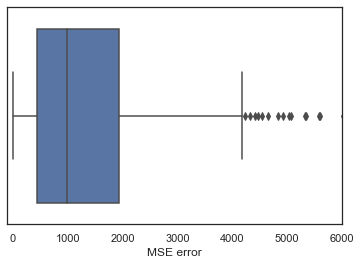

In [248]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=MSE_values,palette=['#b7c9e5'])

ax.set(xlim=(-100,6000))

ax.set_xlabel('MSE error')

----

## 4. Speciality-specific model <a class="anchor" id="4"></a>


* ### 4.1 Data Transformation <a class="anchor" id="4.1"></a>


In [26]:
list_specialities

['General surgery', 'Ophthalmology', 'Urology', 'Neurosurgery', 'Otorhinolaryngology', ..., 'Gastroenterology', 'Cardiology', 'Angiography', 'Cardiac surgery', 'Internal Medicine']
Length: 18
Categories (18, object): ['General surgery', 'Ophthalmology', 'Urology', 'Neurosurgery', ..., 'Cardiology', 'Angiography', 'Cardiac surgery', 'Internal Medicine']

In [27]:
Datasets_specialities=Specialities_Dataset

* ### 4.2. Split Data <a class="anchor" id="4.2"></a> 

In [28]:
Scaler_speciality = {}

for i in range(len(Datasets_specialities)):
    # The Normalization layer
    Scaler_speciality[i] = StandardScaler() 

In [29]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
train_dataset_specialities = {}
test_dataset_specialities = {}

train_features_specialities = {}
test_features_specialities = {}

train_labels_specialities = {}
test_labels_specialities = {}


train_CUF_labels_specialities = {}
test_CUF_labels_specialities = {}

rescale_train_labels_specialities = {}
rescale_test_labels_specialities = {}

for i in range(len(Datasets_specialities)):
    
    
    train_dataset_specialities[i] = Datasets_specialities[list_specialities[i]]['TrainSet']
    test_dataset_specialities[i] = Datasets_specialities[list_specialities[i]]['TestSet']


    train_features_specialities[i] = train_dataset_specialities[i].copy()
    test_features_specialities[i] = test_dataset_specialities[i].copy()

    train_labels_specialities[i] = train_features_specialities[i].pop('Real Room Duration')
    test_labels_specialities[i] = test_features_specialities[i].pop('Real Room Duration')
    

    train_CUF_labels_specialities[i] = train_features_specialities[i].pop('CUF Planned Duration')
    test_CUF_labels_specialities[i] = test_features_specialities[i].pop('CUF Planned Duration')
    
    
    
    #Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""

    #Dataset
    train_dataset_specialities[i] = np.asarray(train_dataset_specialities[i]).astype(np.float32)
    test_dataset_specialities[i] = np.asarray(test_dataset_specialities[i]).astype(np.float32)

    #Features
    train_features_specialities[i] = np.asarray(train_features_specialities[i]).astype(np.float32)
    test_features_specialities[i] = np.asarray(test_features_specialities[i]).astype(np.float32)

    #labels
    train_labels_specialities[i] = np.asarray(train_labels_specialities[i]).astype(np.float32)
    test_labels_specialities[i] = np.asarray(test_labels_specialities[i]).astype(np.float32)

    
    rescale_train_labels_specialities[i]  = Scaler_speciality[i].fit_transform((train_labels_specialities[i].reshape(-1, 1)))
    rescale_test_labels_specialities[i] = Scaler_speciality[i].transform(test_labels_specialities[i].reshape(-1, 1))

    #CUF
    train_CUF_labels_specialities[i] = np.asarray(train_CUF_labels_specialities[i]).astype(np.float32)
    test_CUF_labels_specialities[i] = np.asarray(test_CUF_labels_specialities[i]).astype(np.float32)


* ### 4.3. Normalization layer <a class="anchor" id="4.3"></a> 

In [34]:
Normalization_layer_specialities = {}

for i in range(len(Datasets_specialities)):
    # The Normalization layer
    Normalization_layer_specialities[i] = preprocessing.Normalization()

    #This calculates the mean and variance, and stores them in the layer.
    Normalization_layer_specialities[i].adapt(np.array(train_features_specialities[i]))


In [20]:
Dictionary_specialities_models={} #creation of dictionaries for all 442 models 

for i in range(len(list_specialities)):
    Dictionary_specialities_models.update({list_specialities[i]:{}})

#this_dict = {}this_dict = {}



In [21]:

Predictions_specialities_models={} #creation of dictionaries for all 442 models 

for i in range(len(list_specialities)):
    Predictions_specialities_models.update({list_specialities[i]:{}})

#this_dict = {}this_dict = {}

In [22]:
Best_number_of_layers={} #creation of dictionaries for all 442 models 

for i in range(len(list_specialities)):
    Best_number_of_layers.update({list_specialities[i]:{}})

#this_dict = {}this_dict = {}

* ### 4.4. Tunning Parameters <a class="anchor" id="4.4"></a> 

In [23]:
def generate_model(layers_number,speciality):
    
    tf.keras.backend.clear_session()
    
    modelgenerate = tf.keras.Sequential()
    modelgenerate.add(Normalization_layer_specialities[speciality])

    for i in range(0,layers_number):
        
        print(i)
        modelgenerate.add(tf.keras.layers.Dense(units=50,activation='relu'))
    
    modelgenerate.add(tf.keras.layers.Dense(1))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    modelgenerate.compile(
                optimizer=opt,
                loss='mse',metrics=['mse']
            )
    return modelgenerate

In [57]:
layers=np.arange(2,22,2)

History_layers_surgeon= {}
for i in range(len(layers)):
    History_layers_surgeon.update({layers[i]:{}})

In [58]:
speciality=5
for j in range(len(layers)):
    
    
    layers_number=layers[j]
    
    modelgenerate=generate_model(layers_number,speciality)
    
    
    history = modelgenerate.fit(
        train_features_specialities[speciality], rescale_train_labels_specialities[speciality],
        validation_split=0.2,  #Fraction of the training data to be used as validation data.
        verbose=1, epochs=100)
    

    
    History_layers_surgeon[layers[j]].update({"History": history})
    

0
1
Epoch 1/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4723 - mse: 0.4723 - val_loss: 0.4312 - val_mse: 0.4312
Epoch 2/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.4309 - val_mse: 0.4309
Epoch 3/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4223 - mse: 0.4223 - val_loss: 0.4251 - val_mse: 0.4251
Epoch 4/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4153 - mse: 0.4153 - val_loss: 0.4200 - val_mse: 0.4200
Epoch 5/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.4177 - val_mse: 0.4177
Epoch 6/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4069 - mse: 0.4069 - val_loss: 0.4261 - val_mse: 0.4261
Epoch 7/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4031 - mse: 0.4031 - val_loss: 0.4173 - val_mse: 0.4173
Epoch 8/100
751/751 [==============================] - 1s 1ms/ste

Epoch 62/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3312 - mse: 0.3312 - val_loss: 0.4285 - val_mse: 0.4285
Epoch 63/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3303 - mse: 0.3303 - val_loss: 0.4287 - val_mse: 0.4287
Epoch 64/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3306 - mse: 0.3306 - val_loss: 0.4322 - val_mse: 0.4322
Epoch 65/100
751/751 [==============================] - 1s 991us/step - loss: 0.3294 - mse: 0.3294 - val_loss: 0.4371 - val_mse: 0.4371
Epoch 66/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3282 - mse: 0.3282 - val_loss: 0.4256 - val_mse: 0.4256
Epoch 67/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3279 - mse: 0.3279 - val_loss: 0.4401 - val_mse: 0.4401
Epoch 68/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3290 - mse: 0.3290 - val_loss: 0.4322 - val_mse: 0.4322
Epoch 69/100
751/751 [==============================] - 1s 1

751/751 [==============================] - 1s 1ms/step - loss: 0.2150 - mse: 0.2150 - val_loss: 0.5300 - val_mse: 0.5300
Epoch 84/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2145 - mse: 0.2145 - val_loss: 0.5221 - val_mse: 0.5221
Epoch 85/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2126 - mse: 0.2126 - val_loss: 0.5111 - val_mse: 0.5111
Epoch 86/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2172 - mse: 0.2172 - val_loss: 0.5366 - val_mse: 0.5366
Epoch 87/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2092 - mse: 0.2092 - val_loss: 0.5208 - val_mse: 0.5208
Epoch 88/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2102 - mse: 0.2102 - val_loss: 0.5400 - val_mse: 0.5400
Epoch 89/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2101 - mse: 0.2101 - val_loss: 0.5398 - val_mse: 0.5398
Epoch 90/100
751/751 [==============================] - 1s 1ms/step - loss:

Epoch 44/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2762 - mse: 0.2762 - val_loss: 0.4660 - val_mse: 0.4660
Epoch 45/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2743 - mse: 0.2743 - val_loss: 0.4587 - val_mse: 0.4587
Epoch 46/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2690 - mse: 0.2690 - val_loss: 0.4600 - val_mse: 0.4600
Epoch 47/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2710 - mse: 0.2710 - val_loss: 0.4732 - val_mse: 0.4732
Epoch 48/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2661 - mse: 0.2661 - val_loss: 0.4955 - val_mse: 0.4955
Epoch 49/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2668 - mse: 0.2668 - val_loss: 0.4632 - val_mse: 0.4632
Epoch 50/100
751/751 [==============================] - 1s 1ms/step - loss: 0.2572 - mse: 0.2572 - val_loss: 0.4725 - val_mse: 0.4725
Epoch 51/100
751/751 [==============================] - 1s 1ms

751/751 [==============================] - 1s 1ms/step - loss: 0.4176 - mse: 0.4176 - val_loss: 0.4369 - val_mse: 0.4369
Epoch 6/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.4188 - val_mse: 0.4188
Epoch 7/100
751/751 [==============================] - 1s 1ms/step - loss: 0.4040 - mse: 0.4040 - val_loss: 0.4193 - val_mse: 0.4193
Epoch 8/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3985 - mse: 0.3985 - val_loss: 0.4102 - val_mse: 0.4102
Epoch 9/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3917 - mse: 0.3917 - val_loss: 0.4168 - val_mse: 0.4168
Epoch 10/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3872 - mse: 0.3872 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 11/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3820 - mse: 0.3820 - val_loss: 0.4220 - val_mse: 0.4220
Epoch 12/100
751/751 [==============================] - 1s 1ms/step - loss: 0.3

751/751 [==============================] - 1s 2ms/step - loss: 0.3209 - mse: 0.3209 - val_loss: 0.4658 - val_mse: 0.4658
Epoch 28/100
751/751 [==============================] - 1s 2ms/step - loss: 0.3130 - mse: 0.3130 - val_loss: 0.4553 - val_mse: 0.4553
Epoch 29/100
751/751 [==============================] - ETA: 0s - loss: 0.3146 - mse: 0.314 - 1s 2ms/step - loss: 0.3149 - mse: 0.3149 - val_loss: 0.4423 - val_mse: 0.4423
Epoch 30/100
751/751 [==============================] - 1s 2ms/step - loss: 0.3074 - mse: 0.3074 - val_loss: 0.4501 - val_mse: 0.4501
Epoch 31/100
751/751 [==============================] - 1s 2ms/step - loss: 0.3080 - mse: 0.3080 - val_loss: 0.4405 - val_mse: 0.4405
Epoch 32/100
751/751 [==============================] - 1s 2ms/step - loss: 0.3075 - mse: 0.3075 - val_loss: 0.4546 - val_mse: 0.4546
Epoch 33/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2988 - mse: 0.2988 - val_loss: 0.4516 - val_mse: 0.4516
Epoch 34/100
751/751 [===============

Epoch 88/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2021 - mse: 0.2021 - val_loss: 0.5285 - val_mse: 0.5285
Epoch 89/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2032 - mse: 0.2032 - val_loss: 0.5371 - val_mse: 0.5371
Epoch 90/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2060 - mse: 0.2060 - val_loss: 0.5043 - val_mse: 0.5043
Epoch 91/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2031 - mse: 0.2031 - val_loss: 0.5324 - val_mse: 0.5324
Epoch 92/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.5048 - val_mse: 0.5048
Epoch 93/100
751/751 [==============================] - 1s 2ms/step - loss: 0.1935 - mse: 0.1935 - val_loss: 0.5404 - val_mse: 0.5404
Epoch 94/100
751/751 [==============================] - 1s 2ms/step - loss: 0.1974 - mse: 0.1974 - val_loss: 0.5111 - val_mse: 0.5111
Epoch 95/100
751/751 [==============================] - 1s 2ms

Epoch 49/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2638 - mse: 0.2638 - val_loss: 0.4738 - val_mse: 0.4738
Epoch 50/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2635 - mse: 0.2635 - val_loss: 0.4807 - val_mse: 0.4807
Epoch 51/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2569 - mse: 0.2569 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 52/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2594 - mse: 0.2594 - val_loss: 0.4714 - val_mse: 0.4714
Epoch 53/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2592 - mse: 0.2592 - val_loss: 0.4750 - val_mse: 0.4750
Epoch 54/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 55/100
751/751 [==============================] - 1s 2ms/step - loss: 0.2531 - mse: 0.2531 - val_loss: 0.4730 - val_mse: 0.4730
Epoch 56/100
751/751 [==============================] - 1s 2ms

Epoch 10/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3947 - mse: 0.3947 - val_loss: 0.4100 - val_mse: 0.4100
Epoch 11/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.4115 - val_mse: 0.4115
Epoch 12/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3847 - mse: 0.3847 - val_loss: 0.4139 - val_mse: 0.4139
Epoch 13/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3832 - mse: 0.3832 - val_loss: 0.4351 - val_mse: 0.4351
Epoch 14/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3805 - mse: 0.3805 - val_loss: 0.4127 - val_mse: 0.4127
Epoch 15/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3732 - mse: 0.3732 - val_loss: 0.4367 - val_mse: 0.4367
Epoch 16/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3710 - mse: 0.3710 - val_loss: 0.4138 - val_mse: 0.4138
Epoch 17/100
751/751 [==============================] - 2s 3ms

751/751 [==============================] - 2s 2ms/step - loss: 0.3126 - mse: 0.3126 - val_loss: 0.4584 - val_mse: 0.4584
Epoch 33/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3079 - mse: 0.3079 - val_loss: 0.4522 - val_mse: 0.4522
Epoch 34/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3072 - mse: 0.3072 - val_loss: 0.4509 - val_mse: 0.4509
Epoch 35/100
751/751 [==============================] - 2s 2ms/step - loss: 0.3065 - mse: 0.3065 - val_loss: 0.4523 - val_mse: 0.4523
Epoch 36/100
751/751 [==============================] - 2s 2ms/step - loss: 0.2985 - mse: 0.2985 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 37/100
751/751 [==============================] - 2s 2ms/step - loss: 0.2975 - mse: 0.2975 - val_loss: 0.4569 - val_mse: 0.4569
Epoch 38/100
751/751 [==============================] - 2s 2ms/step - loss: 0.2954 - mse: 0.2954 - val_loss: 0.4624 - val_mse: 0.4624
Epoch 39/100
751/751 [==============================] - 2s 2ms/step - loss:

Epoch 54/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2778 - mse: 0.2778 - val_loss: 0.4514 - val_mse: 0.4514
Epoch 55/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2741 - mse: 0.2741 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 56/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2723 - mse: 0.2723 - val_loss: 0.4587 - val_mse: 0.4587
Epoch 57/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2718 - mse: 0.2718 - val_loss: 0.4884 - val_mse: 0.4884
Epoch 58/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2704 - mse: 0.2704 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 59/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2758 - mse: 0.2758 - val_loss: 0.4788 - val_mse: 0.4788
Epoch 60/100
751/751 [==============================] - 2s 3ms/step - loss: 0.2712 - mse: 0.2712 - val_loss: 0.4727 - val_mse: 0.4727
Epoch 61/100
751/751 [==============================] - 2s 3ms

Epoch 15/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3702 - mse: 0.3702 - val_loss: 0.4202 - val_mse: 0.4202
Epoch 16/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3656 - mse: 0.3656 - val_loss: 0.4199 - val_mse: 0.4199
Epoch 17/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3614 - mse: 0.3614 - val_loss: 0.4125 - val_mse: 0.4125
Epoch 18/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.4093 - val_mse: 0.4093
Epoch 19/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3540 - mse: 0.3540 - val_loss: 0.4254 - val_mse: 0.4254
Epoch 20/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3511 - mse: 0.3511 - val_loss: 0.4233 - val_mse: 0.4233
Epoch 21/100
751/751 [==============================] - 2s 3ms/step - loss: 0.3471 - mse: 0.3471 - val_loss: 0.4206 - val_mse: 0.4206
Epoch 22/100
751/751 [==============================] - 2s 3ms

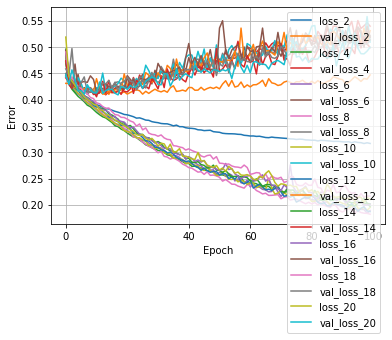

In [59]:
def plot_loss_speciality():
    
    for i in range(len(layers)):
        
        name_loss="loss_{}".format(layers[i])
        name_val_loss="val_loss_{}".format(layers[i])
        history=History_layers_surgeon[layers[i]]["History"]
        plt.plot(history.history['loss'], label=name_loss)
        plt.plot(history.history['val_loss'], label=name_val_loss)
    
    
    plt.xlabel('Epoch')
    plt.ylabel("Error")
        
    plt.legend()
    plt.grid(True)

plot_loss_speciality()

In [60]:

min_list=[]
min_loss_train=[]
for b in range(len(layers)):
    history=History_layers_surgeon[layers[b]]["History"]
    min_list=min_list+[min(history.history['val_loss'])]
    min_loss_train=min_loss_train+[min(history.history['loss'])]
    #plt.plot(history.history['loss'], label=name_loss)
    
    
Min_Loss = {"Number of Layers": layers, "Minimum Loss Point in Validation": min_list}
Min_Loss=pd.DataFrame(Min_Loss)
Min_Loss


,Number of Layers,Minimum Loss Point in Validation
0,2,0.410313
1,4,0.405733
2,6,0.410727
3,8,0.410200
4,10,0.411786
5,12,0.411054
6,14,0.410039
7,16,0.415855
8,18,0.412683
9,20,0.409289


In [61]:
number_of_layers=Min_Loss["Number of Layers"][Min_Loss["Minimum Loss Point in Validation"]==min(Min_Loss["Minimum Loss Point in Validation"])].values[0]
number_of_layers

4

In [40]:
number_of_layers=4

In [38]:
#Variation number of hidden layers

class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = tf.keras.Sequential()
        
        
        model.add(normalizer3)
        
        
        for i in range(0,number_of_layers):
            model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=16,
                                                max_value=64,
                                                step=4), activation='relu'))
            
            
            model.add(tf.keras.layers.BatchNormalization())
            
            model.add(
            tf.keras.layers.Dropout(
                hp.Float(
                    'dropout_' + str(i),
                    min_value=0.1,
                    max_value=0.5,
                    default=0.1,
                    step=0.05)
            ))
            
            
            
            
           

        

        
        model.add(tf.keras.layers.Dense(1))
        
        lr = hp.Choice('learning_rate', [1e-2, 1e-3])
        
       
       
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse',metrics=['mse']
    
        )
        
        return model

In [26]:
for i in range(len(list_specialities)):
   
    input_shape = (train_features_specialities[i].shape[1],)
    normalizer3=Normalization_layer_specialities[i]
    hypermodel= RegressionHyperModel(input_shape)
    
    name="RandomSearch_Speciality_{}".format(i)

    tuner_rs= RandomSearch(
                hypermodel,
                objective='val_mse',
                seed=42,
                max_trials=20,
                project_name=name,
                executions_per_trial=1)
    print(i)
    tuner_rs.search(train_features_specialities[i], rescale_train_labels_specialities[i], epochs=10, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)], verbose=1)
    print(i)
    hyperparameters_hb=tuner_rs.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
    print(i)
    best_mode_rs = tuner_rs.get_best_models(num_models=1)[0]
    loss, mse = best_mode_rs.evaluate(test_features_specialities[i],rescale_test_labels_specialities[i])
    
    Dictionary_specialities_models[list_specialities[i]].update({"Hyperparameters": hyperparameters_hb})
    Dictionary_specialities_models[list_specialities[i]].update({"Model": tuner_rs})
    Dictionary_specialities_models[list_specialities[i]].update({"Evaluation": [loss, mse]})

INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_0\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_0\tuner0.json
0
INFO:tensorflow:Oracle triggered exit
0
0
79/79 [==============================] - 0s 935us/step - loss: 0.4548 - mse: 0.4548
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_1\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_1\tuner0.json
1
INFO:tensorflow:Oracle triggered exit
1
1
86/86 [==============================] - 0s 988us/step - loss: 0.4142 - mse: 0.4142
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_2\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_2\tuner0.json
2
INFO:tensorflow:Oracle triggered exit
2
2
49/49 [==============================] - 0s 1ms/step - loss: 0.3249 - mse: 0.3249
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_3\oracle.json
INFO:te

INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_8\tuner0.json
8
INFO:tensorflow:Oracle triggered exit
8
8
39/39 [==============================] - 0s 1ms/step - loss: 0.3903 - mse: 0.3903
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_9\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_9\tuner0.json
9
INFO:tensorflow:Oracle triggered exit
9
9
20/20 [==============================] - 0s 1ms/step - loss: 0.2797 - mse: 0.2797
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_10\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_10\tuner0.json
10
INFO:tensorflow:Oracle triggered exit
10
10
11/11 [==============================] - 0s 2ms/step - loss: 0.4742 - mse: 0.4742
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_11\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_11\tuner0.json
11
INFO:tensorflow:Ora

INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_15\tuner0.json
15
INFO:tensorflow:Oracle triggered exit
15
15
10/10 [==============================] - 0s 2ms/step - loss: 0.6536 - mse: 0.6536
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_16\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_16\tuner0.json
16
INFO:tensorflow:Oracle triggered exit
16
16
2/2 [==============================] - 0s 2ms/step - loss: 0.3391 - mse: 0.3391
INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_17\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_17\tuner0.json
17
INFO:tensorflow:Oracle triggered exit
17
17
1/1 [==============================] - 0s 309ms/step - loss: 2.0099 - mse: 2.0099


In [27]:
def best_batch_size_speciality(j):
    
    History_data= {}
    
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


    batch_size = [8,16, 32,64, 128, 256, 512]

    better_history = float("Inf")

    for b in range(len(batch_size)):
        History_data.update({batch_size[b]:{}})

    for t in range(len(batch_size)):
        #Mean Absolute Error is less sensitive to outliers

        
        model_cuf_name="model_cuf_specialities_{}".format(j)

        model_cuf_name = tf.keras.Sequential()
        model_cuf_name.add(Normalization_layer_specialities[j])


       #num_layers=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"]["num_layers"]

        for i in range(0,number_of_layers):
            name="units_{}".format(i)
            name_dropout="dropout_{}".format(i)

            model_cuf_name.add(tf.keras.layers.Dense(units=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"][name],activation='relu'))
            model_cuf_name.add(tf.keras.layers.BatchNormalization())

            model_cuf_name.add(tf.keras.layers.Dropout(Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"][name_dropout]))





        model_cuf_name.add(tf.keras.layers.Dense(1))


        lr=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"]["learning_rate"]
        model_cuf_name.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='mse')

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        history = model_cuf_name.fit(
        train_features_specialities[j], rescale_train_labels_specialities[j],callbacks=[early_stopping],
        validation_split=0.2,batch_size=batch_size[t],  #Fraction of the training data to be used as validation data.
        verbose=0, epochs=200)


        actual_history=min(history.history['val_loss'])
        
        if actual_history < better_history:
            better_history = actual_history
            best_params = batch_size[t]
        History_data[batch_size[t]].update({"History": history})
    return best_params

### 4.5.  Building Neural Network, Traning and Model Save <a class="anchor" id="4.5"></a> 

In [28]:
# Neural network
for j in range(len(list_specialities)):
    
    

    best_batch=best_batch_size_speciality(j)
    print(best_batch)
    model_cuf_name="model_cuf_specialities_{}".format(j)
    
    model_cuf_name = tf.keras.Sequential()
    model_cuf_name.add(Normalization_layer_specialities[j])
    
    #num_layers=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"]["num_layers"]

    for i in range(0,number_of_layers):
        name="units_{}".format(i)
        name_dropout="dropout_{}".format(i)
        
        model_cuf_name.add(tf.keras.layers.Dense(units=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"][name],activation='relu'))
        model_cuf_name.add(tf.keras.layers.BatchNormalization())
        
        model_cuf_name.add(tf.keras.layers.Dropout(Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"][name_dropout]))
    

    
    model_cuf_name.add(tf.keras.layers.Dense(1))
    
    
    lr=Dictionary_specialities_models[list_specialities[j]]["Hyperparameters"]["learning_rate"]
    model_cuf_name.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse')
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    
    history = model_cuf_name.fit(
    train_features_specialities[j], rescale_train_labels_specialities[j],callbacks=[early_stopping],
    validation_split=0.2, batch_size=best_batch,  #Fraction of the training data to be used as validation data.
    verbose=0, epochs=200)
    
    
    evaluation=model_cuf_name.evaluate(test_features_specialities[j],rescale_test_labels_specialities[j], verbose=0)
    predictions=model_cuf_name.predict(test_features_specialities[j]).flatten()
    
    
    name="model_cuf_specialities_{}".format(j)
    model_cuf_name.save(name)
    
    Predictions_specialities_models[list_specialities[j]].update({"Modelname": name})
    Predictions_specialities_models[list_specialities[j]].update({"HistoryTrain": history})
    Predictions_specialities_models[list_specialities[j]].update({"Final_Evaluation": evaluation})
    Predictions_specialities_models[list_specialities[j]].update({"Predictions": predictions})
    
    
  


128
INFO:tensorflow:Assets written to: model_cuf_specialities_0\assets
64
INFO:tensorflow:Assets written to: model_cuf_specialities_1\assets
32
INFO:tensorflow:Assets written to: model_cuf_specialities_2\assets
64
INFO:tensorflow:Assets written to: model_cuf_specialities_3\assets
128
INFO:tensorflow:Assets written to: model_cuf_specialities_4\assets
512
INFO:tensorflow:Assets written to: model_cuf_specialities_5\assets
128
INFO:tensorflow:Assets written to: model_cuf_specialities_6\assets
64
INFO:tensorflow:Assets written to: model_cuf_specialities_7\assets
64
INFO:tensorflow:Assets written to: model_cuf_specialities_8\assets
32
INFO:tensorflow:Assets written to: model_cuf_specialities_9\assets
32
INFO:tensorflow:Assets written to: model_cuf_specialities_10\assets
64
INFO:tensorflow:Assets written to: model_cuf_specialities_11\assets
32
INFO:tensorflow:Assets written to: model_cuf_specialities_12\assets
32
INFO:tensorflow:Assets written to: model_cuf_specialities_13\assets
16
INFO:tens

* ### 4.6.  Predictions <a class="anchor" id="4.6"></a> 

In [30]:
Loading_speciality_models={}  

for i in range(len(list_specialities)):

    Loading_speciality_models.update({list_specialities[i]:{}})

for i in range(len(list_specialities)): 
    print('1')
    name="model_cuf_specialities_{}".format(i)
    Reloaded = tf.keras.models.load_model(name)
    
    
    predictions=Reloaded.predict(test_features_specialities[i]).flatten()
    
    predictions_remove_scale=Scaler_speciality[i].inverse_transform(predictions) #remove normalization of labels
    
    print(i)
    #Loading_Surgeon_models[list_surgeons[i]].update({"Label DNN":Predictions_Surgeon_models[list_surgeons[i]]["Predictions"]})
    Loading_speciality_models[list_specialities[i]].update({"Label DNN":predictions_remove_scale})
    
    Loading_speciality_models[list_specialities[i]].update({"Planned CUF": test_CUF_labels_specialities[i]})
    Loading_speciality_models[list_specialities[i]].update({"Real Duaration":test_labels_specialities[i]})

    

1
0
1
1
1
2
1
3
1
4
1
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17


* #### 4.6.1  Specific speciality Prediction <a class="anchor" id="4.6.1"></a> 

In [31]:
#cho4ose a number between 0-422 to choose speciality
i=17


planned_bycuf=Loading_speciality_models[list_specialities[i]]["Planned CUF"]
labels_test=Loading_speciality_models[list_specialities[i]]["Label DNN"]
real_duration=Loading_speciality_models[list_specialities[i]]["Real Duaration"]

print("Prediction to {} Speciality ".format(list_specialities[i]))

Prediction to Internal Medicine Speciality 


* Model

In [41]:
name="RandomSearch_Speciality_{}".format(i)

input_shape = (train_features_specialities[i].shape[1],)
normalizer3=Normalization_layer_specialities[i]
hypermodel= RegressionHyperModel(input_shape)

tuner_rs_final= RandomSearch(
                hypermodel,
                objective='val_mse',
                seed=42,
                max_trials=15,
                project_name=name,
                executions_per_trial=2)
    
parameters=tuner_rs_final.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
parameters
    


INFO:tensorflow:Reloading Oracle from existing project .\RandomSearch_Speciality_17\oracle.json
INFO:tensorflow:Reloading Tuner from .\RandomSearch_Speciality_17\tuner0.json


{'units_0': 40,
 'dropout_0': 0.3500000000000001,
 'units_1': 60,
 'dropout_1': 0.30000000000000004,
 'units_2': 56,
 'dropout_2': 0.15000000000000002,
 'units_3': 44,
 'dropout_3': 0.25000000000000006,
 'learning_rate': 0.01}

In [42]:
name="model_cuf_specialities_{}".format(i)
Reloaded_pred = tf.keras.models.load_model(name)
Reloaded_pred.summary()


Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_18 (Normalizat (None, 14)                29        
_________________________________________________________________
dense_720 (Dense)            (None, 40)                600       
_________________________________________________________________
batch_normalization_576 (Bat (None, 40)                160       
_________________________________________________________________
dropout_576 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_721 (Dense)            (None, 60)                2460      
_________________________________________________________________
batch_normalization_577 (Bat (None, 60)                240       
_________________________________________________________________
dropout_577 (Dropout)        (None, 60)             

In [43]:
Reloaded_pred.evaluate(test_features_specialities[i],rescale_test_labels_specialities[i], verbose=0)

0.7137649059295654

In [44]:
dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from DNN": labels_test}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton

,Real Duration,Planned by Cuf,Labels from DNN
0,70.0,60.0,35.240490
1,25.0,70.0,66.820282
2,22.0,50.0,115.278664
3,34.0,40.0,44.588131
4,34.0,60.0,65.018250
5,98.0,64.0,77.615654
6,20.0,30.0,38.428741
7,21.0,24.0,69.073662
8,65.0,85.0,76.569717
9,135.0,60.0,108.923836


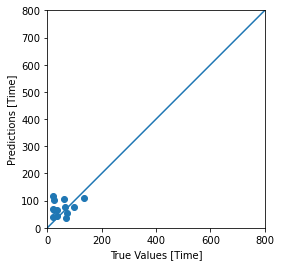

In [45]:



a = plt.axes(aspect='equal')
plt.scatter(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

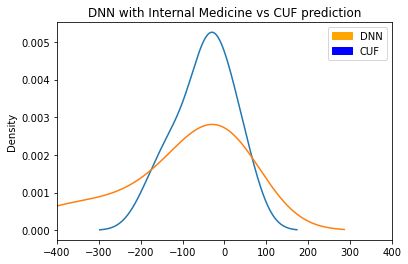

In [46]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_DNN'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_DNN'].plot(kind='density')


plt.xlim([-400, 400])
label="DNN with {} vs CUF prediction".format(list_specialities[i])
plt.title(label)
orange_patch = mpatches.Patch(color='orange', label='DNN')
blue_patch = mpatches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [47]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
DNN_overuse=dataset_predicton[dataset_predicton['Error_DNN']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
DNN_under=dataset_predicton[dataset_predicton['Error_DNN']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
DNN_Within=dataset_predicton[dataset_predicton['Error_DNN'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['DNN Model', DNN_Within, DNN_overuse,DNN_under]]
print(tabulate(table))

---------  ------  -------------------  ------------------
Model      Within  Overutilization      Underutilization
CUF Model  0.0     0.23076923076923078  0.7692307692307693
DNN Model  0.0     0.3076923076923077   0.6923076923076923
---------  ------  -------------------  ------------------


* #### 4.6.2  Overall with all specialities models <a class="anchor" id="4.6.2"></a> 

In [48]:
def generalresults_speacility(i):
    
    #load model
    planned_bycuf=Loading_speciality_models[list_specialities[i]]["Planned CUF"]
    labels_test=Loading_speciality_models[list_specialities[i]]["Label DNN"]
    real_duration=Loading_speciality_models[list_specialities[i]]["Real Duaration"]
    
    #generate table for each speciality
    dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from DNN": labels_test}
    dataset_predicton=pd.DataFrame(dataset_predicton)
    dataset_predicton
    
    #generate errors for each speciality
    dataset_predicton['Error_DNN'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #percentage (0-1)- Overutilization
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    DNN_overuse=dataset_predicton[dataset_predicton['Error_DNN']>10].shape[0]/dataset_predicton.shape[0]
    
    # percentage (0-1) - Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    DNN_under=dataset_predicton[dataset_predicton['Error_DNN']<-10].shape[0]/dataset_predicton.shape[0]
    
    #percentage (0-1) - Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    DNN_Within=dataset_predicton[dataset_predicton['Error_DNN'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    
    return DNN_Within,DNN_under,DNN_overuse,CUF_Within,CUF_under,CUF_overuse,dataset_predicton.shape[0]


In [49]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Overall_speciality_results={}  

for i in range(len(list_specialities)):
    Overall_speciality_results.update({list_specialities[i]:{}})

for i in range(len(list_specialities)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    general_results=generalresults_speacility(i)
    
    Overall_speciality_results[list_specialities[i]].update({"DNN":{"Whithin":general_results[0], "Underuse":general_results[1],"Overuse":general_results[2]}})
    Overall_speciality_results[list_specialities[i]].update({"Planned CUF":{"Whithin":general_results[3],"Underuse":general_results[4],"Overuse":general_results[5]}})
    Overall_speciality_results[list_specialities[i]].update({"Number of Surgeries":general_results[6]})


In [50]:
Number_surgeries=0
Total_Number_surgeries=0

DNN_within=0
DNN_under=0
DNN_over=0

CUF_within=0
CUF_under=0
CUF_over=0

for i in range(len(list_specialities)):
    
    Number_surgeries=Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]
    
    DNN_within=DNN_within+Overall_speciality_results[list_specialities[i]]["DNN"]["Whithin"]*Number_surgeries
    DNN_under=DNN_under+Overall_speciality_results[list_specialities[i]]["DNN"]["Underuse"]*Number_surgeries
    DNN_over=DNN_over+Overall_speciality_results[list_specialities[i]]["DNN"]["Overuse"]*Number_surgeries
    
    CUF_within=CUF_within+Overall_speciality_results[list_specialities[i]]["Planned CUF"]["Whithin"]*Number_surgeries
    CUF_under=CUF_under+Overall_speciality_results[list_specialities[i]]["Planned CUF"]["Underuse"]*Number_surgeries
    CUF_over=CUF_over+Overall_speciality_results[list_specialities[i]]["Planned CUF"]["Overuse"]*Number_surgeries
    
Total_DNN_within=DNN_within/Total_Number_surgeries
Total_DNN_under=DNN_under/Total_Number_surgeries
Total_DNN_over=DNN_over/Total_Number_surgeries
Total_CUF_within=CUF_within/Total_Number_surgeries
Total_CUF_under=CUF_under/Total_Number_surgeries
Total_CUF_over=CUF_over/Total_Number_surgeries
    


In [51]:
table_speciality_overall = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', Total_CUF_within, Total_CUF_over,Total_CUF_under], ['DNN Model', Total_DNN_within, Total_DNN_over,Total_DNN_under]]
print(tabulate(table_speciality_overall))

---------  -------------------  -------------------  ------------------
Model      Within               Overutilization      Underutilization
CUF Model  0.19004951662343786  0.29032067908512144  0.5196298042914407
DNN Model  0.24215986795567082  0.33494458854043857  0.4228955435038906
---------  -------------------  -------------------  ------------------


* Graph with specialities

In [52]:


name=[]
within=[]
surgeries=[]
cuf=[]
specialities=list_specialities
for i in range(len(specialities)):
    name.append(specialities[i])
    within.append(Overall_speciality_results[list_specialities[i]]["DNN"]["Whithin"])
    surgeries.append(Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]/0.2)
    cuf.append(Overall_speciality_results[list_specialities[i]]["Planned CUF"]["Whithin"])
    
Within_predictions = {"Speciality": name, "Within DNN Predictions": within,"Within CUF Predictions": cuf,"Number of Surgeries": surgeries}

Within_predictions=pd.DataFrame(Within_predictions).sort_values(by='Within DNN Predictions',ascending=False)

Within_predictions=Within_predictions.set_index('Speciality')
Within_predictions=pd.DataFrame(Within_predictions).sort_values(by='Within DNN Predictions',ascending=False)

Within_predictions

,Within DNN Predictions,Within CUF Predictions,Number of Surgeries
Speciality,,,
Dermatology,0.408946,0.434505,1565.0
Pediatric Surgery,0.277259,0.171340,1605.0
Otorhinolaryngology,0.266432,0.207160,8520.0
Cardiac surgery,0.265625,0.281250,320.0
Vascular Surgery,0.258114,0.151468,3235.0
Ophthalmology,0.253573,0.157933,13645.0
Neurosurgery,0.248932,0.192308,4680.0
Orthopedics,0.243135,0.199413,18755.0
Cardiology,0.241379,0.137931,145.0


Text(0, 0.5, 'Specialty')

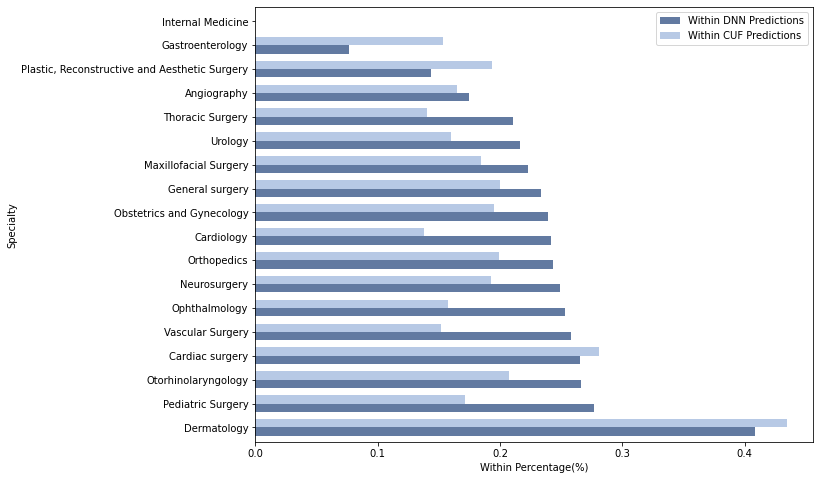

In [53]:
plt.show()
Within_predictions.drop(columns=['Number of Surgeries']).plot(kind='barh',figsize=(10, 8),width=0.7,color=['#627aa1','#b7c9e5'])
plt.xlabel('Within Percentage(%)')
plt.ylabel('Specialty')

###  MSE

In [54]:
def funtion_mse_return(y,y_bar):
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
        difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
        squared_difference = difference**2  #taking square of the differene 
        summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    return MSE

In [55]:
y_cuf=Loading_speciality_models[list_specialities[16]]["Planned CUF"]
y_true=Loading_speciality_models[list_specialities[16]]["Real Duaration"]
y_dnn=Loading_speciality_models[list_specialities[16]]["Label DNN"]


In [56]:
mse_cuf=[]
mse_dnn=[]
specialities=list_specialities


for i in range(len(list_specialities)):
    y_cuf=Loading_speciality_models[list_specialities[i]]["Planned CUF"]
    y_true=Loading_speciality_models[list_specialities[i]]["Real Duaration"]
    y_dnn=Loading_speciality_models[list_specialities[i]]["Label DNN"]


    mse_cuf=mse_cuf+[round(funtion_mse_return(y_cuf,y_true),2)]
    mse_dnn=mse_dnn+[round(funtion_mse_return(y_dnn,y_true),2)]
    


MSE_results = {"Speciality": specialities, "MSE CUF": mse_cuf, "MSE DNN": mse_dnn}
MSE_results=pd.DataFrame(MSE_results)
MSE_results

,Speciality,MSE CUF,MSE DNN
0,General surgery,3451.59,1696.65
1,Ophthalmology,456.49,261.00
2,Urology,1806.37,1019.76
3,Neurosurgery,3101.61,2711.52
4,Otorhinolaryngology,1422.11,1182.60
5,Orthopedics,2271.17,1550.39
6,Vascular Surgery,3064.69,1540.63
7,Dermatology,138.61,75.42
8,Obstetrics and Gynecology,1571.11,871.04
9,"Plastic, Reconstructive and Aesthetic Surgery",2661.37,2043.79


In [57]:
Number_surgeries=0
Total_Number_surgeries=0

MSE_dnn=0
MSE_cuf=0

mse_total=[]

for i in range(len(list_specialities)):
                   
   
    Number_surgeries=Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]
    
    mse_total+=[MSE_results["MSE DNN"][i]]
    
    MSE_cuf=MSE_cuf+MSE_results["MSE CUF"][i]*Number_surgeries
    MSE_dnn=MSE_dnn+MSE_results["MSE DNN"][i]*Number_surgeries

    
    
    
Total_MSE_cuf=MSE_cuf/Total_Number_surgeries
Total_MSE_dnn=MSE_dnn/Total_Number_surgeries

table_surgeon_mse = [['Model', 'MSE Error'], ['CUF Model', Total_MSE_cuf], ['DNN Model', Total_MSE_dnn]]
print(tabulate(table_surgeon_mse))

---------  ------------------
Model      MSE Error
CUF Model  2232.9567554821974
DNN Model  1306.8103578165526
---------  ------------------


Text(0.5, 0, 'MSE error')

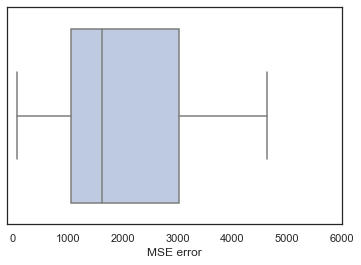

In [68]:
import seaborn as sns
sns.set_theme(style="white")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=mse_total,palette=['#b7c9e5'])
patch_artist=True
ax.set(xlim=(-100,6000))

ax.set_xlabel('MSE error')

In [ ]:
color=['#627aa1']

I removed Cardiact Surgery because two surgeries are badly perdicted, and because the true values are big outliers, the error is really large. One surgery has the duration of 17 and the CUF label is 600 and our is 200

In [62]:
Number_surgeries=0
Total_Number_surgeries=0

MSE_dnn=0
MSE_cuf=0

for i in range(len(list_specialities)):
                   
    if i!=16:
    
        Number_surgeries=Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]
        Total_Number_surgeries=Total_Number_surgeries+Overall_speciality_results[list_specialities[i]]["Number of Surgeries"]

        MSE_cuf=MSE_cuf+MSE_results["MSE CUF"][i]*Number_surgeries
        MSE_dnn=MSE_dnn+MSE_results["MSE DNN"][i]*Number_surgeries

    
    
    
Total_MSE_cuf=MSE_cuf/Total_Number_surgeries
Total_MSE_dnn=MSE_dnn/Total_Number_surgeries

table_surgeon_mse = [['Model', 'MSE Error'], ['CUF Model', Total_MSE_cuf], ['DNN Model', Total_MSE_dnn]]
print(tabulate(table_surgeon_mse))

---------  ------------------
Model      MSE Error
CUF Model  2214.1361609467453
DNN Model  1297.6092041420118
---------  ------------------


------

## 5. CUF Deep Neural Network Model with Output normalized <a class="anchor" id="5"></a>

* ### 5.1. Data Transformation <a class="anchor" id="5.1"></a> 

Performed in second chapter

* ### 5.2. Tunning Parameters <a class="anchor" id="5.2"></a> 

* Learning Rate tunning

In [63]:
def tune_rl_model(hp):
    model = tf.keras.Sequential()
    model.add(normalizer)
    
    model.add(tf.keras.layers.Dense(
      units=30,
      activation="relu",
      input_shape=input_shape
    ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Dense(
      units=30,
      activation="relu"
    ))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Dense(1))
    
    lr = hp.Choice('learning_rate', [1e-1,1e-2, 1e-3])
   
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss = 'mse',
        metrics = ['mse'])
    return model

input_shape = (train_features.shape[1],)


tuner_rs_lr_m= RandomSearch(
            tune_rl_model,
            objective='val_mse',
            seed=42,
            max_trials=20,
            project_name='RandomSearch_LR_normalizedoutput',
            executions_per_trial=1)

tuner_rs_lr_m.search(train_features, train_labels_rescaled, epochs=10, validation_split=0.2, verbose=1)

Trial 3 Complete [00h 00m 48s]
val_mse: 0.36211031675338745

Best val_mse So Far: 0.3598305583000183
Total elapsed time: 00h 02m 25s
INFO:tensorflow:Oracle triggered exit


In [64]:

best_mode_rs_lr_NormalizedOutput = tuner_rs_lr_m.get_best_models(num_models=1)[0]
loss, mse = best_mode_rs_lr_NormalizedOutput.evaluate(test_features, test_labels_rescaled)


531/531 [==============================] - 1s 676us/step - loss: 0.3470 - mse: 0.3470


In [65]:
LearningRate_NormalizedOutput=tuner_rs_lr_m.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
LearningRate_NormalizedOutput

{'learning_rate': 0.001}

* Best number of layers

In [66]:
layers=np.arange(2,22,2)

History_layers= {}
for i in range(len(layers)):
    History_layers.update({layers[i]:{}})
    

    

In [67]:
def generate_model(layers_number):
    
    tf.keras.backend.clear_session()
    
    modelgenerate = tf.keras.Sequential()
    modelgenerate.add(normalizer)

    for i in range(0,layers_number):
        
        print(i)
        modelgenerate.add(tf.keras.layers.Dense(units=50,activation='relu'))
    
    modelgenerate.add(tf.keras.layers.Dense(1))

    opt = tf.keras.optimizers.Adam(learning_rate=LearningRate_NormalizedOutput['learning_rate'])

    modelgenerate.compile(
                optimizer=opt,
                loss='mse',metrics=['mse']
            )
    return modelgenerate

In [68]:
for j in range(len(layers)):
    
    
    layers_number=layers[j]
    
    modelgenerate=generate_model(layers_number)
    
  
    
    history = modelgenerate.fit(
        train_features, train_labels_rescaled,
        validation_split=0.2,  #Fraction of the training data to be used as validation data.
        verbose=1, epochs=100)
    

    
    History_layers[layers[j]].update({"History": history})
    




0
1
Epoch 1/100
3396/3396 [==============================] - 4s 972us/step - loss: 0.3667 - mse: 0.3667 - val_loss: 0.3781 - val_mse: 0.3781
Epoch 2/100
3396/3396 [==============================] - 3s 948us/step - loss: 0.3465 - mse: 0.3465 - val_loss: 0.3657 - val_mse: 0.3657
Epoch 3/100
3396/3396 [==============================] - 3s 991us/step - loss: 0.3419 - mse: 0.3419 - val_loss: 0.3628 - val_mse: 0.3628
Epoch 4/100
3396/3396 [==============================] - 3s 1ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.3657 - val_mse: 0.3657
Epoch 5/100
3396/3396 [==============================] - 3s 960us/step - loss: 0.3355 - mse: 0.3355 - val_loss: 0.3590 - val_mse: 0.3590
Epoch 6/100
3396/3396 [==============================] - 3s 959us/step - loss: 0.3333 - mse: 0.3333 - val_loss: 0.3588 - val_mse: 0.3588
Epoch 7/100
3396/3396 [==============================] - 3s 960us/step - loss: 0.3312 - mse: 0.3312 - val_loss: 0.3600 - val_mse: 0.3600
Epoch 8/100
3396/3396 [================

Epoch 20/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3072 - mse: 0.3072 - val_loss: 0.3634 - val_mse: 0.3634
Epoch 21/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3063 - mse: 0.3063 - val_loss: 0.3556 - val_mse: 0.3556
Epoch 22/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3055 - mse: 0.3055 - val_loss: 0.3620 - val_mse: 0.3620
Epoch 23/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3041 - mse: 0.3041 - val_loss: 0.3547 - val_mse: 0.3547
Epoch 24/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3035 - mse: 0.3035 - val_loss: 0.3560 - val_mse: 0.3560
Epoch 25/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3014 - mse: 0.3014 - val_loss: 0.3559 - val_mse: 0.3559
Epoch 26/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.3016 - mse: 0.3016 - val_loss: 0.3573 - val_mse: 0.3573
Epoch 27/100
3396/3396 [========================

3396/3396 [==============================] - 4s 1ms/step - loss: 0.2889 - mse: 0.2889 - val_loss: 0.3738 - val_mse: 0.3738
Epoch 41/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2869 - mse: 0.2869 - val_loss: 0.3628 - val_mse: 0.3628
Epoch 42/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2875 - mse: 0.2875 - val_loss: 0.3594 - val_mse: 0.3594
Epoch 43/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2861 - mse: 0.2861 - val_loss: 0.3656 - val_mse: 0.3656
Epoch 44/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2849 - mse: 0.2849 - val_loss: 0.3611 - val_mse: 0.3611
Epoch 45/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2833 - mse: 0.2833 - val_loss: 0.3606 - val_mse: 0.3606
Epoch 46/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2835 - mse: 0.2835 - val_loss: 0.3621 - val_mse: 0.3621
Epoch 47/100
3396/3396 [==============================] - 4s 

3396/3396 [==============================] - 4s 1ms/step - loss: 0.2755 - mse: 0.2755 - val_loss: 0.3700 - val_mse: 0.3700
Epoch 61/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2776 - mse: 0.2776 - val_loss: 0.3676 - val_mse: 0.3676
Epoch 62/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2747 - mse: 0.2747 - val_loss: 0.3711 - val_mse: 0.3711
Epoch 63/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2747 - mse: 0.2747 - val_loss: 0.3700 - val_mse: 0.3700
Epoch 64/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2724 - mse: 0.2724 - val_loss: 0.3619 - val_mse: 0.3619
Epoch 65/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2735 - mse: 0.2735 - val_loss: 0.3824 - val_mse: 0.3824
Epoch 66/100
3396/3396 [==============================] - 4s 1ms/step - loss: 0.2737 - mse: 0.2737 - val_loss: 0.3739 - val_mse: 0.3739
Epoch 67/100
3396/3396 [==============================] - 4s 

3396/3396 [==============================] - 5s 1ms/step - loss: 0.2648 - mse: 0.2648 - val_loss: 0.3854 - val_mse: 0.3854
Epoch 81/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2649 - mse: 0.2649 - val_loss: 0.3663 - val_mse: 0.3663
Epoch 82/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2639 - mse: 0.2639 - val_loss: 0.3739 - val_mse: 0.3739
Epoch 83/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2637 - mse: 0.2637 - val_loss: 0.3883 - val_mse: 0.3883
Epoch 84/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2592 - mse: 0.2592 - val_loss: 0.3809 - val_mse: 0.3809
Epoch 85/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2629 - mse: 0.2629 - val_loss: 0.3783 - val_mse: 0.3783
Epoch 86/100
3396/3396 [==============================] - 5s 1ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.3692 - val_mse: 0.3692
Epoch 87/100
3396/3396 [==============================] - 5s 

3396/3396 [==============================] - 5s 2ms/step - loss: 0.2530 - mse: 0.2530 - val_loss: 0.3790 - val_mse: 0.3790
0
1
2
3
4
5
6
7
8
9
10
11
12
13
Epoch 1/100
3396/3396 [==============================] - 7s 2ms/step - loss: 0.3806 - mse: 0.3806 - val_loss: 0.3693 - val_mse: 0.3693
Epoch 2/100
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3569 - mse: 0.3569 - val_loss: 0.3772 - val_mse: 0.3772
Epoch 3/100
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3494 - mse: 0.3494 - val_loss: 0.3829 - val_mse: 0.3829
Epoch 4/100
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3442 - mse: 0.3442 - val_loss: 0.3621 - val_mse: 0.3621
Epoch 5/100
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3411 - mse: 0.3411 - val_loss: 0.3608 - val_mse: 0.3608
Epoch 6/100
3396/3396 [==============================] - 6s 2ms/step - loss: 0.3363 - mse: 0.3363 - val_loss: 0.3619 - val_mse: 0.3619
Epoch 7/100
3396/3396 [============

3396/3396 [==============================] - 8s 2ms/step - loss: 0.3142 - mse: 0.3142 - val_loss: 0.3605 - val_mse: 0.3605
Epoch 21/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3124 - mse: 0.3124 - val_loss: 0.3805 - val_mse: 0.3805
Epoch 22/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3122 - mse: 0.3122 - val_loss: 0.3577 - val_mse: 0.3577
Epoch 23/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3109 - mse: 0.3109 - val_loss: 0.3654 - val_mse: 0.3654
Epoch 24/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3096 - mse: 0.3096 - val_loss: 0.3582 - val_mse: 0.3582
Epoch 25/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3079 - mse: 0.3079 - val_loss: 0.3666 - val_mse: 0.3666
Epoch 26/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.3083 - mse: 0.3083 - val_loss: 0.3622 - val_mse: 0.3622
Epoch 27/100
3396/3396 [==============================] - 8s 

3396/3396 [==============================] - 8s 2ms/step - loss: 0.2927 - mse: 0.2927 - val_loss: 0.3669 - val_mse: 0.3669
Epoch 41/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2913 - mse: 0.2913 - val_loss: 0.3619 - val_mse: 0.3619
Epoch 42/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2902 - mse: 0.2902 - val_loss: 0.3726 - val_mse: 0.3726
Epoch 43/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2898 - mse: 0.2898 - val_loss: 0.3832 - val_mse: 0.3832
Epoch 44/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2915 - mse: 0.2915 - val_loss: 0.3725 - val_mse: 0.3725
Epoch 45/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2888 - mse: 0.2888 - val_loss: 0.3700 - val_mse: 0.3700
Epoch 46/100
3396/3396 [==============================] - 9s 3ms/step - loss: 0.2901 - mse: 0.2901 - val_loss: 0.3647 - val_mse: 0.3647
Epoch 47/100
3396/3396 [==============================] - 8s 

3396/3396 [==============================] - 9s 3ms/step - loss: 0.2817 - mse: 0.2817 - val_loss: 0.4058 - val_mse: 0.4058
Epoch 61/100
3396/3396 [==============================] - 9s 3ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.3796 - val_mse: 0.3796
Epoch 62/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2809 - mse: 0.2809 - val_loss: 0.3826 - val_mse: 0.3826
Epoch 63/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2794 - mse: 0.2794 - val_loss: 0.3733 - val_mse: 0.3733
Epoch 64/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2776 - mse: 0.2776 - val_loss: 0.3820 - val_mse: 0.3820
Epoch 65/100
3396/3396 [==============================] - 8s 2ms/step - loss: 0.2774 - mse: 0.2774 - val_loss: 0.3789 - val_mse: 0.3789
Epoch 66/100
3396/3396 [==============================] - 9s 3ms/step - loss: 0.2771 - mse: 0.2771 - val_loss: 0.3793 - val_mse: 0.3793
Epoch 67/100
3396/3396 [==============================] - 9s 

In [201]:
layers=np.arange(2,22,2)


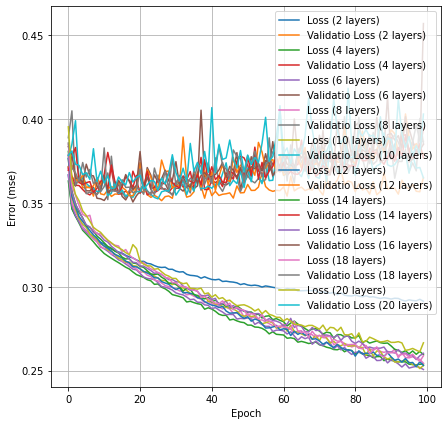

In [202]:
def plot_loss():
    
    for i in range(len(layers)):
         
        name_loss="Loss ({} layers)".format(layers[i])
        name_val_loss="Validatio Loss ({} layers)".format(layers[i])
        history=History_layers[layers[i]]["History"]
        plt.plot(history.history['loss'], label=name_loss)
        plt.plot(history.history['val_loss'], label=name_val_loss)
        
    
    
    plt.xlabel('Epoch')
    plt.ylabel("Error (mse)")
        
    plt.legend()
    
    plt.grid(True)
plt.figure(figsize=(7, 7))
plot_loss()

In [203]:
min_list=[]
min_loss_train=[]

for i in range(len(layers)):
    history=History_layers[layers[i]]["History"]
    min_list=min_list+[min(history.history['val_loss'])]
    min_loss_train=min_loss_train+[min(history.history['loss'])]
    #plt.plot(history.history['loss'], label=name_loss)
    
    
Min_Loss = {"Number of Layers": layers, "Minimum Loss Point in Validation": min_list}
Min_Loss=pd.DataFrame(Min_Loss)
Min_Loss

,Number of Layers,Minimum Loss Point in Validation
0,2,0.351228
1,4,0.354639
2,6,0.350418
3,8,0.351863
4,10,0.352316
5,12,0.354156
6,14,0.356165
7,16,0.356120
8,18,0.354476
9,20,0.357271


In [71]:
number_of_layers=Min_Loss["Number of Layers"][Min_Loss["Minimum Loss Point in Validation"]==min(Min_Loss["Minimum Loss Point in Validation"])].values[0]
number_of_layers

6

In [81]:
number_of_layers=6

In [82]:

x = np.where(layers == number_of_layers)


In [83]:
number_of_layers

6

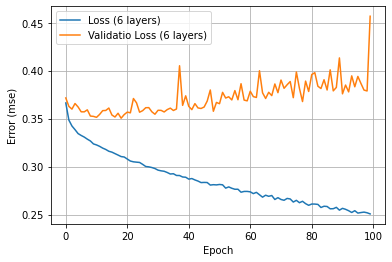

In [89]:
history=History_layers[number_of_layers]["History"]
plt.plot(history.history['loss'], label="Loss ({} layers)".format(number_of_layers))
plt.plot(history.history['val_loss'], label="Validatio Loss ({} layers)".format(number_of_layers))

plt.xlabel('Epoch')
plt.ylabel("Error (mse)")
        
plt.legend()
plt.grid(True)



* 6 layers is the best

In [36]:
#Variation number of hidden layers

class RegressionHyperModel_2(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(normalizer)
       
        
        for i in range(0,number_of_layers):
            
           
                         
            model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=16,
                                                max_value=64,
                                                step=4),activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())
            
            model.add(
            tf.keras.layers.Dropout(
                hp.Float(
                    'dropout_' + str(i),
                    min_value=0.1,
                    max_value=0.5,
                    default=0.1,
                    step=0.05)
            ))
            
          


        
        model.add(tf.keras.layers.Dense(1))
        
        opt = tf.keras.optimizers.Adam(learning_rate=LearningRate_NormalizedOutput['learning_rate'])
        
        model.compile(
            optimizer=opt,
            loss='mse',metrics=['mse']
    
        )
        
        return model

In [91]:
input_shape = (train_features.shape[1],)
hypermodel_2 = RegressionHyperModel_2(input_shape)

tuner_rs_NormalizedOutput= RandomSearch(
            hypermodel_2,
            objective='val_mse',
            seed=42,
            max_trials=20,
            project_name='RandomSearch_Hyper_NormalizedOutput_2',
            executions_per_trial=1)



In [92]:
tuner_rs_NormalizedOutput.search(train_features, train_labels_rescaled, epochs=10, validation_split=0.2, verbose=1)

Trial 20 Complete [00h 02m 03s]
val_mse: 0.3701271712779999

Best val_mse So Far: 0.36281782388687134
Total elapsed time: 00h 40m 37s
INFO:tensorflow:Oracle triggered exit


In [93]:

best_tuner_rs_NormalizedOutput = tuner_rs_NormalizedOutput.get_best_models(num_models=1)[0]
loss, mse = best_tuner_rs_NormalizedOutput.evaluate(test_features, test_labels_rescaled)

531/531 [==============================] - 1s 2ms/step - loss: 0.3488 - mse: 0.3488


In [94]:
hyperparameters_NormalizedOutput=tuner_rs_NormalizedOutput.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

* ### 5.3. Building Model <a class="anchor" id="5.3"></a> 

In [95]:
bestparamters=hyperparameters_NormalizedOutput
bestparamters

{'units_0': 60,
 'dropout_0': 0.15000000000000002,
 'units_1': 64,
 'dropout_1': 0.1,
 'units_2': 44,
 'dropout_2': 0.20000000000000004,
 'units_3': 32,
 'dropout_3': 0.30000000000000004,
 'units_4': 60,
 'dropout_4': 0.30000000000000004,
 'units_5': 40,
 'dropout_5': 0.25000000000000006}

In [96]:
def form_model_outputnormalized():
    model_cuf_outputnormalized = tf.keras.Sequential()
    model_cuf_outputnormalized.add(normalizer)

    for i in range(0,number_of_layers):
        name="units_{}".format(i)
        name_dropout="dropout_{}".format(i)
        model_cuf_outputnormalized.add(tf.keras.layers.Dense(units=bestparamters[name],activation='relu'))
        model_cuf_outputnormalized.add(tf.keras.layers.BatchNormalization())

        model_cuf_outputnormalized.add(tf.keras.layers.Dropout(bestparamters[name_dropout]))



    model_cuf_outputnormalized.add(tf.keras.layers.Dense(1))
    
    #less sensitive to outliers

    opt = tf.keras.optimizers.Adam(learning_rate=LearningRate_NormalizedOutput['learning_rate'])

    model_cuf_outputnormalized.compile(loss='mse',
                    optimizer=opt)
    
    return model_cuf_outputnormalized


In [97]:
# Neural network 
model_cuf_outputnormalized = tf.keras.Sequential()
model_cuf_outputnormalized.add(normalizer)


for i in range(0,number_of_layers):
    name="units_{}".format(i)
    name_dropout="dropout_{}".format(i)
    model_cuf_outputnormalized.add(tf.keras.layers.Dense(units=bestparamters[name],activation='relu'))
    model_cuf_outputnormalized.add(tf.keras.layers.BatchNormalization())
    
    model_cuf_outputnormalized.add(tf.keras.layers.Dropout(bestparamters[name_dropout]))
    


model_cuf_outputnormalized.add(tf.keras.layers.Dense(1))



In [98]:
#less sensitive to outliers

opt = tf.keras.optimizers.Adam(learning_rate=LearningRate_NormalizedOutput['learning_rate'])
    
    
model_cuf_outputnormalized.compile(loss='mse',
                optimizer=opt)

In [99]:
model_cuf_outputnormalized.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 15)                31        
_________________________________________________________________
dense_7 (Dense)              (None, 60)                960       
_________________________________________________________________
batch_normalization_6 (Batch (None, 60)                240       
_________________________________________________________________
dropout_6 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                3904      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

* ### 5.4. Training <a class="anchor" id="5.4"></a> 

In [106]:
%%time

History_data_normalized= {}

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


batch_size = [16, 32,64, 128, 256, 512,1024]

better_history = float("Inf")


for i in range(len(batch_size)):
    History_data_normalized.update({batch_size[i]:{}})

for i in range(len(batch_size)):
    #Mean Absolute Error is less sensitive to outliers
    
    model_cuf_outputnormalized=form_model_outputnormalized()
    
    history = model_cuf_outputnormalized.fit(
        train_features, train_labels_rescaled,
        validation_split=0.2,  #Fraction of the training data to be used as validation data.
        verbose=1, batch_size=batch_size[i], epochs=100)
    
    actual_history=min(history.history['val_loss'])
    
    if actual_history < better_history:
        better_history = actual_history
        best_params = batch_size[i]
    
    History_data_normalized[batch_size[i]].update({"History": history})
    
    


Epoch 1/100
6791/6791 [==============================] - 24s 3ms/step - loss: 0.5873 - val_loss: 0.3842
Epoch 2/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4831 - val_loss: 0.3979
Epoch 3/100
6791/6791 [==============================] - 22s 3ms/step - loss: 0.4760 - val_loss: 0.3742
Epoch 4/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4715 - val_loss: 0.3759
Epoch 5/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4701 - val_loss: 0.3859
Epoch 6/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4622 - val_loss: 0.3668
Epoch 7/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4509 - val_loss: 0.3728
Epoch 8/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4446 - val_loss: 0.3733
Epoch 9/100
6791/6791 [==============================] - 20s 3ms/step - loss: 0.4419 - val_loss: 0.3878
Epoch 10/100
6791/6791 [==============================] - 21s 3m

6791/6791 [==============================] - 21s 3ms/step - loss: 0.4111 - val_loss: 0.3994
Epoch 80/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4131 - val_loss: 0.3760
Epoch 81/100
6791/6791 [==============================] - 22s 3ms/step - loss: 0.4146 - val_loss: 0.3607
Epoch 82/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4147 - val_loss: 0.3715
Epoch 83/100
6791/6791 [==============================] - 20s 3ms/step - loss: 0.4130 - val_loss: 0.3745
Epoch 84/100
6791/6791 [==============================] - 20s 3ms/step - loss: 0.4136 - val_loss: 0.3940
Epoch 85/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4102 - val_loss: 0.3899
Epoch 86/100
6791/6791 [==============================] - 20s 3ms/step - loss: 0.4104 - val_loss: 0.3689
Epoch 87/100
6791/6791 [==============================] - 21s 3ms/step - loss: 0.4105 - val_loss: 0.3770
Epoch 88/100
6791/6791 [==============================] - 20s 3ms/st

1698/1698 [==============================] - 6s 4ms/step - loss: 0.3803 - val_loss: 0.3579
Epoch 36/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3789 - val_loss: 0.3546
Epoch 37/100
1698/1698 [==============================] - 7s 4ms/step - loss: 0.3798 - val_loss: 0.3582
Epoch 38/100
1698/1698 [==============================] - 7s 4ms/step - loss: 0.3765 - val_loss: 0.3613
Epoch 39/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3759 - val_loss: 0.3549
Epoch 40/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3760 - val_loss: 0.3585
Epoch 41/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3758 - val_loss: 0.3567
Epoch 42/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3757 - val_loss: 0.3543
Epoch 43/100
1698/1698 [==============================] - 6s 4ms/step - loss: 0.3786 - val_loss: 0.3556
Epoch 44/100
1698/1698 [==============================] - 7s 4ms/step - loss:

849/849 [==============================] - 5s 5ms/step - loss: 0.3549 - val_loss: 0.3687
Epoch 95/100
849/849 [==============================] - 4s 5ms/step - loss: 0.3566 - val_loss: 0.3500
Epoch 96/100
849/849 [==============================] - 5s 5ms/step - loss: 0.3564 - val_loss: 0.3494
Epoch 97/100
849/849 [==============================] - 4s 5ms/step - loss: 0.3551 - val_loss: 0.3496
Epoch 98/100
849/849 [==============================] - 5s 5ms/step - loss: 0.3559 - val_loss: 0.3546
Epoch 99/100
849/849 [==============================] - 4s 5ms/step - loss: 0.3555 - val_loss: 0.3507
Epoch 100/100
849/849 [==============================] - 5s 5ms/step - loss: 0.3545 - val_loss: 0.3525
Epoch 1/100
425/425 [==============================] - 6s 8ms/step - loss: 0.8865 - val_loss: 0.4039
Epoch 2/100
425/425 [==============================] - 3s 7ms/step - loss: 0.4746 - val_loss: 0.3883
Epoch 3/100
425/425 [==============================] - 3s 7ms/step - loss: 0.4341 - val_loss: 0.

213/213 [==============================] - 2s 8ms/step - loss: 0.3550 - val_loss: 0.3562
Epoch 55/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3529 - val_loss: 0.3575
Epoch 56/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3561 - val_loss: 0.3560
Epoch 57/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3543 - val_loss: 0.3545
Epoch 58/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3556 - val_loss: 0.3587
Epoch 59/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3509 - val_loss: 0.3536
Epoch 60/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3521 - val_loss: 0.3532
Epoch 61/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3531 - val_loss: 0.3540
Epoch 62/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3523 - val_loss: 0.3625
Epoch 63/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3509 - val_loss: 

In [206]:
batch_size = [32,64, 128, 256, 512,1024]

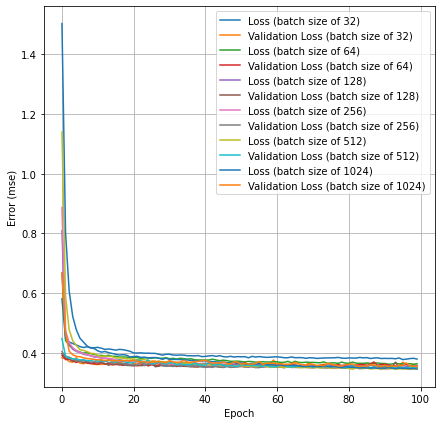

In [207]:
def plot_loss_batch():
    
    for i in range(len(batch_size)):
        name_loss="Loss (batch size of {})".format(batch_size[i])
        name_val_loss="Validation Loss (batch size of {})".format(batch_size[i])
        
        history=History_data_normalized[batch_size[i]]["History"]
        plt.plot(history.history['loss'], label=name_loss)
        plt.plot(history.history['val_loss'], label=name_val_loss)
    plt.xlabel('Epoch')
    plt.ylabel("Error (mse)")
    plt.legend()
    plt.grid(True)
plt.figure(figsize=(7, 7))
plot_loss_batch()

In [108]:
min_list=[]
min_loss_train=[]

for i in range(len(batch_size)):
    history=History_data_normalized[batch_size[i]]["History"]
    min_list=min_list+[min(history.history['val_loss'])]
    min_loss_train=min_loss_train+[min(history.history['loss'])]
    #plt.plot(history.history['loss'], label=name_loss)
    
    
Min_Loss = {"Number of Batches": batch_size, "Minimum Loss Point in Validation": min_list}
Min_Loss=pd.DataFrame(Min_Loss)
Min_Loss

,Number of Batches,Minimum Loss Point in Validation
0,16,0.360727
1,32,0.351409
2,64,0.353143
3,128,0.348791
4,256,0.346995
5,512,0.348794
6,1024,0.353641


In [118]:
best_params=256

In [130]:

print("Best size",best_params)


Best size 256


In [131]:
# Neural network 
model_cuf_outputnormalized = tf.keras.Sequential()
model_cuf_outputnormalized.add(normalizer)


for i in range(0,number_of_layers):
    name="units_{}".format(i)
    name_dropout="dropout_{}".format(i)
    model_cuf_outputnormalized.add(tf.keras.layers.Dense(units=bestparamters[name],activation='relu'))
    model_cuf_outputnormalized.add(tf.keras.layers.BatchNormalization())
    
    model_cuf_outputnormalized.add(tf.keras.layers.Dropout(bestparamters[name_dropout]))
    


model_cuf_outputnormalized.add(tf.keras.layers.Dense(1))

#less sensitive to outliers

opt = tf.keras.optimizers.Adam(learning_rate=LearningRate_NormalizedOutput['learning_rate'])
    
    
model_cuf_outputnormalized.compile(loss='mse',
                optimizer=opt)


In [132]:

%%time

#batch_size = hp.Choice('batch_size', [6, 7, 8, 16, 32, 64, 128, 256, 512, 1024])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
#Mean Absolute Error is less sensitive to outliers
history = model_cuf_outputnormalized.fit(
    train_features, train_labels_rescaled,
    callbacks=[early_stopping],
    validation_split=0.2,  #Fraction of the training data to be used as validation data.
    verbose=1, batch_size=best_params, epochs=200)

Epoch 1/200
425/425 [==============================] - 6s 8ms/step - loss: 1.0636 - val_loss: 0.4147
Epoch 2/200
425/425 [==============================] - 3s 8ms/step - loss: 0.5114 - val_loss: 0.3909
Epoch 3/200
425/425 [==============================] - 3s 8ms/step - loss: 0.4500 - val_loss: 0.3831
Epoch 4/200
425/425 [==============================] - 3s 7ms/step - loss: 0.4225 - val_loss: 0.3807
Epoch 5/200
425/425 [==============================] - 3s 8ms/step - loss: 0.4144 - val_loss: 0.3774
Epoch 6/200
425/425 [==============================] - 3s 7ms/step - loss: 0.4082 - val_loss: 0.3744
Epoch 7/200
425/425 [==============================] - 3s 8ms/step - loss: 0.4016 - val_loss: 0.3724
Epoch 8/200
425/425 [==============================] - 3s 8ms/step - loss: 0.3953 - val_loss: 0.3753
Epoch 9/200
425/425 [==============================] - 3s 8ms/step - loss: 0.3919 - val_loss: 0.3698
Epoch 10/200
425/425 [==============================] - 3s 8ms/step - loss: 0.3925 - val_lo

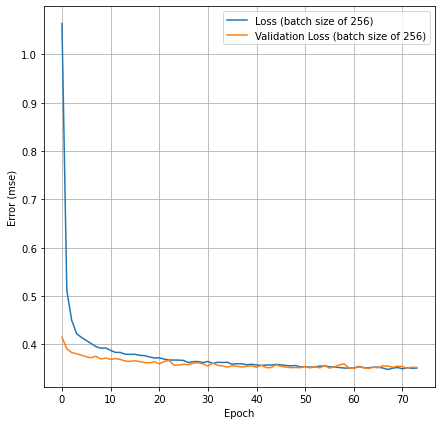

In [133]:
def plot_loss(history):
  plt.plot(history.history['loss'], label="Loss (batch size of 256)")
  plt.plot(history.history['val_loss'], label="Validation Loss (batch size of 256)")
    
    
  plt.xlabel('Epoch')
  plt.ylabel("Error (mse)")
  plt.legend()
  plt.grid(True)
    
plt.figure(figsize=(7, 7))
plot_loss(history)

* ### 5.5. Performance <a class="anchor" id="5.5"></a> 

In [134]:
model_cuf_outputnormalized.evaluate(test_features, test_labels_rescaled, verbose=1)

531/531 [==============================] - 1s 1ms/step - loss: 0.3319


0.3318931460380554

* ### 5.6. Predictions <a class="anchor" id="5.6"></a> 

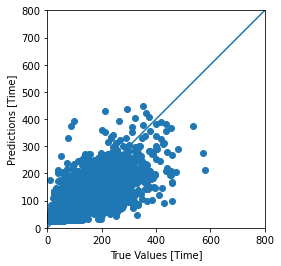

In [135]:
test_predictions = model_cuf_outputnormalized.predict(test_features).flatten()
remove_scale=scaling.inverse_transform(test_predictions) #remove normalization of labels


a = plt.axes(aspect='equal')
plt.scatter(test_labels, remove_scale)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

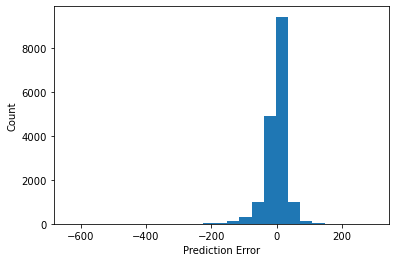

In [136]:
error = remove_scale - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [137]:
dataset_predicton = {"Real Duration": test_labels, "Planned by Cuf": test_CUF_labels, "Labels from DNN": remove_scale}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton

,Real Duration,Planned by Cuf,Labels from DNN
0,41.0,60.0,48.031136
1,55.0,60.0,55.733692
2,12.0,60.0,32.027122
3,53.0,60.0,102.714478
4,55.0,30.0,59.361130
...,...,...,...
16972,19.0,20.0,25.821659
16973,90.0,90.0,87.202095
16974,94.0,60.0,34.381145
16975,33.0,60.0,39.270233


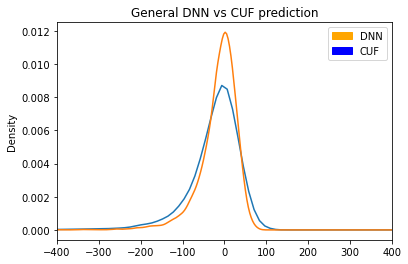

In [138]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_DNN'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from DNN'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_DNN'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General DNN vs CUF prediction')
orange_patch = mpatches.Patch(color='orange', label='DNN')
blue_patch = mpatches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [139]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
DNN_overuse=dataset_predicton[dataset_predicton['Error_DNN']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
DNN_under=dataset_predicton[dataset_predicton['Error_DNN']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
DNN_Within=dataset_predicton[dataset_predicton['Error_DNN'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['DNN Model', DNN_Within, DNN_overuse,DNN_under]]
print(tabulate(table2))

---------  -------------------  -------------------  ------------------
Model      Within               Overutilization      Underutilization
CUF Model  0.1920245037403546   0.28626965895034456  0.5217058373093009
DNN Model  0.23932379101136833  0.3063556576544737   0.454320551334158
---------  -------------------  -------------------  ------------------


#### MSE error

In [140]:
dataset_predicton

,Real Duration,Planned by Cuf,Labels from DNN,Error_DNN,Error_CUF
0,41.0,60.0,48.031136,-17.149111,-46.341465
1,55.0,60.0,55.733692,-1.333986,-9.090909
2,12.0,60.0,32.027122,-166.892685,-400.000000
3,53.0,60.0,102.714478,-93.800903,-13.207547
4,55.0,30.0,59.361130,-7.929327,45.454544
...,...,...,...,...,...
16972,19.0,20.0,25.821659,-35.903469,-5.263158
16973,90.0,90.0,87.202095,3.108783,0.000000
16974,94.0,60.0,34.381145,63.424313,36.170212
16975,33.0,60.0,39.270233,-19.000706,-81.818184


In [141]:
def funtion_mse(y,y_bar):
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
        difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
        squared_difference = difference**2  #taking square of the differene 
        summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    print("The Mean Square Error is: " , MSE)

* CUF MSE error

In [142]:
y_cuf=dataset_predicton['Planned by Cuf'].values
y_true=dataset_predicton['Real Duration'].values
y_dnn=dataset_predicton['Labels from DNN'].values

In [143]:
funtion_mse(y_cuf,y_true)

The Mean Square Error is:  2170.7616186605405


In [144]:
funtion_mse(y_dnn,y_true)

The Mean Square Error is:  1193.1348591950714


* ### 5.7. Save Model <a class="anchor" id="5.7"></a> 

In [145]:
model_cuf_outputnormalized.save('model_cuf_outputnormalized')

INFO:tensorflow:Assets written to: model_cuf_outputnormalized\assets


* ### 5.8. Load Model <a class="anchor" id="5.8"></a> 

In [146]:
model_cuf_outputnormalized = tf.keras.models.load_model('model_cuf_outputnormalized')

model_cuf_outputnormalized.evaluate(test_features, test_labels_rescaled, verbose=0)

0.3318931460380554